In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import re  
import ast 
import folium
from folium.plugins import HeatMap
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import spacy
import nltk
from nltk.corpus import wordnet as wn
from collections import defaultdict

In [ ]:
ruta_I = "C:\Data_Yelp\restaurantes_I-Noreste.csv"
ruta_II = "C:\Data_Yelp\restaurantes_II-Medio-Oeste.csv"
ruta_III = "C:\Data_Yelp\restaurantes_III-Sur.csv"
ruta_IV = "C:\Data_Yelp\restaurantes_IV-Oeste.csv"

In [3]:
data_I = pd.read_csv(ruta_I)

In [ ]:
data_II = pd.read_csv(ruta_II)

In [336]:
data_III = pd.read_csv(ruta_III)

In [337]:
data_IV = pd.read_csv(ruta_IV)

In [71]:
restaurantes_I = data_I.copy()

In [ ]:
restaurantes_II = data_II.copy()

In [72]:
restaurantes_III = data_III.copy()

In [73]:
restaurantes_IV = data_IV.copy()

In [5]:
data_I.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1347199 entries, 0 to 1347198
Data columns (total 22 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   business_id   1347199 non-null  object 
 1   name          1347199 non-null  object 
 2   address       1344783 non-null  object 
 3   city          1347199 non-null  object 
 4   state         1347199 non-null  object 
 5   postal_code   1347085 non-null  object 
 6   latitude      1347199 non-null  float64
 7   longitude     1347199 non-null  float64
 8   stars_x       1347199 non-null  float64
 9   review_count  1347199 non-null  int64  
 10  is_open       1347199 non-null  int64  
 11  attributes    1345670 non-null  object 
 12  categories    1347199 non-null  object 
 13  hours         1301036 non-null  object 
 14  review_id     1347199 non-null  object 
 15  user_id       1347199 non-null  object 
 16  stars_y       1347199 non-null  int64  
 17  useful        1347199 non-n

In [340]:
data_I['stars_y'].describe()

count    1.347199e+06
mean     3.799825e+00
std      1.386958e+00
min      1.000000e+00
25%      3.000000e+00
50%      4.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: stars_y, dtype: float64

In [6]:
data_II.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 724508 entries, 0 to 724507
Data columns (total 22 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   724508 non-null  object 
 1   name          724508 non-null  object 
 2   address       722864 non-null  object 
 3   city          724508 non-null  object 
 4   state         724508 non-null  object 
 5   postal_code   724447 non-null  object 
 6   latitude      724508 non-null  float64
 7   longitude     724508 non-null  float64
 8   stars_x       724508 non-null  float64
 9   review_count  724508 non-null  int64  
 10  is_open       724508 non-null  int64  
 11  attributes    723778 non-null  object 
 12  categories    724508 non-null  object 
 13  hours         698738 non-null  object 
 14  review_id     724508 non-null  object 
 15  user_id       724508 non-null  object 
 16  stars_y       724508 non-null  int64  
 17  useful        724508 non-null  int64  
 18  funn

In [12]:
data_III.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1593996 entries, 0 to 1593995
Data columns (total 22 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   business_id   1593996 non-null  object 
 1   name          1593996 non-null  object 
 2   address       1590165 non-null  object 
 3   city          1593996 non-null  object 
 4   state         1593996 non-null  object 
 5   postal_code   1593920 non-null  object 
 6   latitude      1593996 non-null  float64
 7   longitude     1593996 non-null  float64
 8   stars_x       1593996 non-null  float64
 9   review_count  1593996 non-null  int64  
 10  is_open       1593996 non-null  int64  
 11  attributes    1592329 non-null  object 
 12  categories    1593996 non-null  object 
 13  hours         1537888 non-null  object 
 14  review_id     1593996 non-null  object 
 15  user_id       1593996 non-null  object 
 16  stars_y       1593996 non-null  int64  
 17  useful        1593996 non-n

In [339]:
data_III['stars_y'].describe()

count    1.593996e+06
mean     3.773005e+00
std      1.396961e+00
min      1.000000e+00
25%      3.000000e+00
50%      4.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: stars_y, dtype: float64

In [22]:
data_IV.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881371 entries, 0 to 881370
Data columns (total 22 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   881371 non-null  object 
 1   name          881371 non-null  object 
 2   address       879536 non-null  object 
 3   city          881371 non-null  object 
 4   state         881371 non-null  object 
 5   postal_code   881297 non-null  object 
 6   latitude      881371 non-null  float64
 7   longitude     881371 non-null  float64
 8   stars_x       881371 non-null  float64
 9   review_count  881371 non-null  int64  
 10  is_open       881371 non-null  int64  
 11  attributes    880411 non-null  object 
 12  categories    881371 non-null  object 
 13  hours         851451 non-null  object 
 14  review_id     881371 non-null  object 
 15  user_id       881371 non-null  object 
 16  stars_y       881371 non-null  int64  
 17  useful        881371 non-null  int64  
 18  funn

In [334]:
data_IV['stars_y'].describe()

count    881371.000000
mean          3.819200
std           1.385686
min           1.000000
25%           3.000000
50%           4.000000
75%           5.000000
max           5.000000
Name: stars_y, dtype: float64

- Se verifica cuántos datos hay por estado

In [234]:
restaurantes_I['state'].value_counts()  

state
PA    1070508
NJ     276683
VT          8
Name: count, dtype: int64

In [180]:
restaurantes_II['state'].value_counts()  

state
MO    339402
IN    314643
IL     70445
MI        18
Name: count, dtype: int64

In [181]:
restaurantes_III['state'].value_counts()  

state
FL    824870
TN    370043
LA    323053
DE     75950
TX        80
Name: count, dtype: int64

In [202]:
restaurantes_IV['state'].value_counts()  

state
AZ    321061
NV    256647
CA    153053
ID    150367
WA       114
CO       111
HI        18
Name: count, dtype: int64

## Se filtran los DataFrames considerando los estados más turísticos de las regiones I, II, III y IV : PA, NY, NJ, FL, TN, NV, CA

- Se descarta la región II 

In [74]:
def filtrar_por_palabras(df, columna, palabras):
    """
    Filtra filas de un DataFrame donde los valores en una columna (listas o strings)
    contienen al menos una palabra específica de una lista dada. Luego, reinicia los índices.

    Args:
        df (pd.DataFrame): El DataFrame a procesar.
        columna (str): El nombre de la columna.
        palabras (list): Lista de palabras a buscar.

    Returns:
        pd.DataFrame: Un nuevo DataFrame con las filas filtradas y los índices reiniciados.
    """
    if columna not in df.columns:
        raise ValueError(f"La columna '{columna}' no existe en el DataFrame.")
    
    if not isinstance(palabras, list):
        raise ValueError("El argumento 'palabras' debe ser una lista de palabras.")
    
    # Filtrar filas
    filtrado = df[df[columna].apply(
        lambda x: (
            isinstance(x, list) and any(palabra in x for palabra in palabras)
        ) or (
            isinstance(x, str) and x in palabras
        )
    )]
    
    # Reiniciar índices
    return filtrado.reset_index(drop=True)

In [75]:
palabras_I = ['PA', 'NJ']

restaurantes_I = filtrar_por_palabras(restaurantes_I, 'state', palabras_I)

In [14]:
len(restaurantes_I)

1347191

In [76]:
palabras_III = ['FL', 'TN']

restaurantes_III = filtrar_por_palabras(restaurantes_III, 'state', palabras_III)

In [207]:
len(restaurantes_III)

1194913

In [77]:
palabras_IV = ['NV', 'CA']

restaurantes_IV = filtrar_por_palabras(restaurantes_IV, 'state', palabras_IV)

- Se guardan en DataFrames las columnas que no tienen relación con reviews y se agrupan las filas  por 'business_id'

In [78]:

def filtrar_y_agrupar_por_id(dataframe, columna_limite):
    """
    Filtra y guarda en un nuevo DataFrame todas las columnas de un DataFrame original
    que están antes de una columna específica, luego agrupa las filas por `business_id`.

    Parámetros:
        dataframe (pd.DataFrame): El DataFrame original.
        columna_limite (str): El nombre de la columna límite (exclusiva).

    Retorna:
        pd.DataFrame: Un nuevo DataFrame con las columnas filtradas y las filas agrupadas por `business_id`.
    """
    if columna_limite not in dataframe.columns:
        raise ValueError(f"La columna '{columna_limite}' no está presente en el DataFrame.")
    
    # Obtener las columnas que están antes de la columna límite
    idx_columna_limite = dataframe.columns.get_loc(columna_limite)
    columnas_filtradas = dataframe.columns[:idx_columna_limite]
    
    # Crear el nuevo DataFrame con solo las columnas necesarias
    nuevo_dataframe = dataframe[columnas_filtradas]
    
    # Agrupar por 'business_id' y aplicar agregaciones
    # Aquí, aplicamos una agregación simple (por ejemplo, 'first' para obtener el primer valor de cada grupo)
    # Puedes modificar la agregación según sea necesario (por ejemplo, 'mean', 'sum', 'max', etc.)
    nuevo_dataframe = nuevo_dataframe.groupby('business_id').first().reset_index()

    return nuevo_dataframe


In [79]:
rest_I = filtrar_y_agrupar_por_id(restaurantes_I, columna_limite="review_id")

In [80]:
rest_III = filtrar_y_agrupar_por_id(restaurantes_III, columna_limite="review_id")

In [81]:
rest_IV = filtrar_y_agrupar_por_id(restaurantes_IV, columna_limite="review_id")

- Función que chequea y asegura que los elementos de la columna 'categories' sean listas de palabras

In [82]:
print(rest_I['categories'].apply(type).value_counts())

categories
<class 'str'>    14610
Name: count, dtype: int64


In [83]:
def transformar_categorias_a_listas(df, columna):
    """
    Convierte cadenas que parecen listas en listas reales y elimina anidaciones adicionales.
    
    Args:
        df (pd.DataFrame): DataFrame que contiene los datos.
        columna (str): Nombre de la columna a transformar.
    
    Returns:
        pd.DataFrame: DataFrame con la columna transformada.
    """
    if columna not in df.columns:
        raise ValueError(f"La columna '{columna}' no existe en el DataFrame.")
    
    def convertir_a_lista(x):
        if isinstance(x, str):
            try:
                # Convertir la cadena a una estructura Python (lista, dict, etc.)
                lista = ast.literal_eval(x)
                # Si la lista está anidada, aplanarla
                if isinstance(lista, list) and all(isinstance(i, list) for i in lista):
                    return [item for sublist in lista for item in sublist]
                return lista
            except (ValueError, SyntaxError):
                # Si no puede convertirse, devolver el valor original
                return x
        return x  # Si no es cadena, devolverlo tal como está

    # Aplicar la transformación a la columna
    df[columna] = df[columna].apply(convertir_a_lista)
    return df


In [84]:
rest_I = transformar_categorias_a_listas(rest_I, 'categories')

In [85]:
restaurantes_I = transformar_categorias_a_listas(restaurantes_I, 'categories')

In [86]:
rest_III = transformar_categorias_a_listas(rest_III, 'categories')

In [87]:
restaurantes_III = transformar_categorias_a_listas(restaurantes_III, 'categories')

In [88]:
rest_IV = transformar_categorias_a_listas(rest_IV, 'categories')

In [89]:
restaurantes_IV = transformar_categorias_a_listas(restaurantes_IV, 'categories')

In [90]:
def remover_nulos_o_vacios(df, column_name):
    """
    Elimina las filas de un DataFrame donde la columna especificada sea nula o contenga una lista vacía.

    Args:
        df (pd.DataFrame): El DataFrame original.
        column_name (str): El nombre de la columna a filtrar.

    Returns:
        pd.DataFrame: Un nuevo DataFrame sin filas nulas o listas vacías en la columna especificada.
    """
    # Filtrar filas donde la columna no sea nula ni una lista vacía
    filtered_df = df[df[column_name].notna() & df[column_name].apply(lambda x: not isinstance(x, list) or len(x) > 0)]
    return filtered_df

In [91]:
rest_I = remover_nulos_o_vacios(rest_I, 'categories')

In [92]:
rest_III = remover_nulos_o_vacios(rest_III, 'categories')

In [93]:
rest_IV = remover_nulos_o_vacios(rest_IV, 'categories')

In [94]:
restaurantes_I = remover_nulos_o_vacios(restaurantes_I, 'categories')

In [95]:
restaurantes_III = remover_nulos_o_vacios(restaurantes_III, 'categories')

In [96]:
restaurantes_IV = remover_nulos_o_vacios(restaurantes_IV, 'categories')

##  Distribución de calificaciones ("stars_x")

Objetivo: Identificar cómo se distribuyen las calificaciones de los negocios.

Visualización: Histograma o gráfico de barras.

In [97]:
def plot_distribution(data):
    """
    Esta función genera un histograma con una curva de densidad (KDE) para visualizar la distribución 
    de las calificaciones de los restaurantes en un DataFrame proporcionado.

    Parámetros:
    ----------
    data : pandas.DataFrame
        DataFrame que contiene los datos de los restaurantes. Se espera que tenga una columna llamada 
        'stars_x' que contenga las calificaciones numéricas de los restaurantes.

    Retorna:
    -------
    None
        La función solo muestra el gráfico de distribución, no retorna ningún valor.
    
    Ejemplo:
    --------
    plot_distribution(restaurantes_I)
    """

    plt.figure(figsize=(8, 5))
    sns.histplot(data=data, x='stars_x', bins=5, kde=True, color='skyblue')
    
    
    plt.title('Distribución de calificaciones (Yelp)', fontsize=14)
    plt.xlabel('Calificaciones (stars_x)', fontsize=12)
    plt.ylabel('Frecuencia', fontsize=12)
    
    plt.show()


In [98]:
def unique_value_counts(df, column_name):
    """
    Imprime el conteo de valores únicos en una columna específica de un DataFrame.
    
    Parameters:
    df (pd.DataFrame): El DataFrame que contiene los datos.
    column_name (str): El nombre de la columna a analizar.
    
    Returns:
    pd.Series: Conteo de los valores únicos en la columna.
    """
    value_counts = df[column_name].value_counts()
    print(f"Conteo de valores únicos en la columna '{column_name}':\n")
    return value_counts


In [247]:
plot_distribution(rest_I)

In [248]:
unique_value_counts(rest_I, 'stars_x')

Conteo de valores únicos en la columna 'stars_x':



stars_x
4.0    3801
3.5    3328
4.5    2256
3.0    2102
2.5    1356
2.0     829
5.0     439
1.5     425
1.0      74
Name: count, dtype: int64

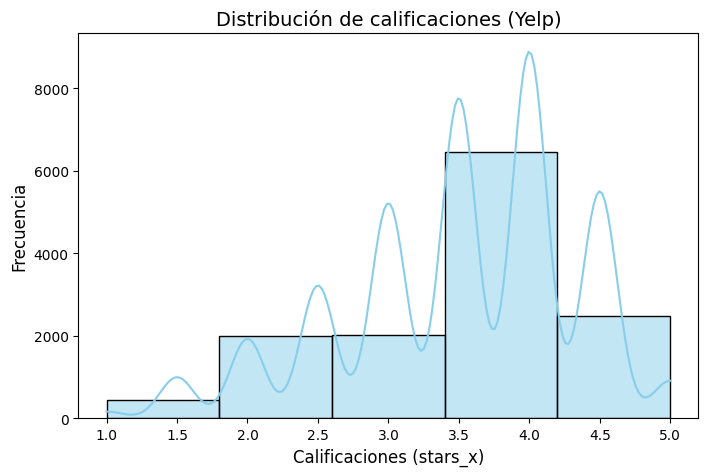

In [221]:
plot_distribution(rest_III)

In [27]:
unique_value_counts(rest_III, 'stars_x')

Conteo de valores únicos en la columna 'stars_x':



stars_x
4.0    3444
3.5    3008
4.5    2132
3.0    2021
2.5    1248
2.0     747
1.5     387
5.0     353
1.0      64
Name: count, dtype: int64

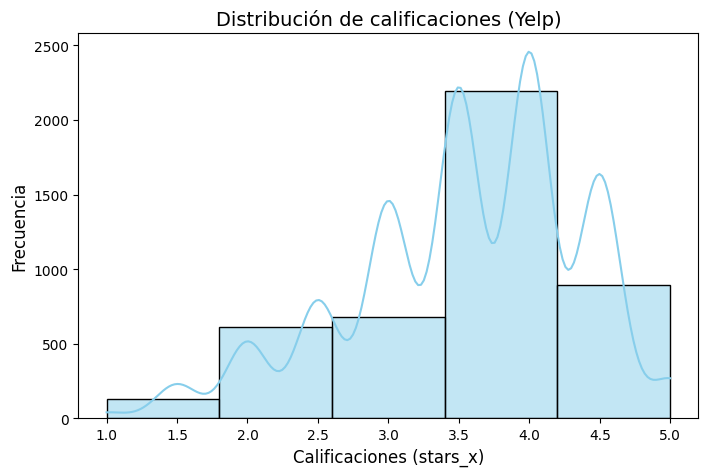

In [223]:
plot_distribution(rest_IV)

In [250]:
unique_value_counts(rest_IV, 'stars_x')

Conteo de valores únicos en la columna 'stars_x':



stars_x
4.0    1153
3.5    1041
4.5     768
3.0     683
2.5     371
2.0     242
5.0     124
1.5     108
1.0      19
Name: count, dtype: int64

- Limpiar la palabra 'Restaurants' de la columna 'categories'
- Aislar las palabras clave de las listas de la columna 'categories'

In [99]:
def limpiar_categorias(data, columna_categorias, subcadena_excluir="rest"):
    """
    Elimina palabras que contengan una subcadena específica de las listas en la columna dada.

    Parámetros:
        data (pd.DataFrame): DataFrame que contiene la columna con categorías.
        columna_categorias (str): Nombre de la columna que contiene las listas de categorías.
        subcadena_excluir (str): Subcadena a excluir (insensible a mayúsculas).

    Retorna:
        pd.DataFrame: DataFrame con la columna de categorías limpia.
    """
    # Verificar que la columna exista
    if columna_categorias not in data.columns:
        raise ValueError(f"La columna '{columna_categorias}' no está presente en el DataFrame.")

    # Eliminar palabras con la subcadena especificada
    def filtrar_categorias(categorias):
        if not isinstance(categorias, list):
            return categorias  # Si no es una lista, no procesar
        return [cat for cat in categorias if not re.search(subcadena_excluir, cat, re.IGNORECASE)]

    data[columna_categorias] = data[columna_categorias].apply(filtrar_categorias)
    return data




## Categorías, frecuencia de categorías y promedio de valoraciones

In [100]:
def contar_categorias_y_promedios(data, columna_categorias, columna_valoraciones):
    """
    Cuenta las categorías y calcula el promedio de valoraciones (stars_x) para cada una,
    limpiando elementos extraños y redondeando los resultados.

    Parámetros:
        data (pd.DataFrame): DataFrame que contiene las categorías y valoraciones.
        columna_categorias (str): Nombre de la columna con las categorías (listas de palabras).
        columna_valoraciones (str): Nombre de la columna con las valoraciones.

    Retorna:
        pd.DataFrame: DataFrame con las categorías, sus frecuencias y el promedio de valoraciones.
    """
    import re
    from collections import Counter

    # Verificar que las columnas existan
    if columna_categorias not in data.columns or columna_valoraciones not in data.columns:
        raise ValueError("Las columnas especificadas no están presentes en el DataFrame.")

    # Aplanar las categorías junto con sus valoraciones
    categorias_planas = []
    for _, row in data.iterrows():
        categorias = row[columna_categorias]
        valoracion = row[columna_valoraciones]
        if isinstance(categorias, list):
            for categoria in categorias:
                categorias_planas.append((categoria, valoracion))

    # Limpiar elementos extraños (eliminar corchetes, comillas, etc.)
    categorias_planas = [(re.sub(r"[\[\]']", "", cat).strip(), valor) for cat, valor in categorias_planas]

    # Contar frecuencias de las categorías
    categorias_frecuencias = Counter([cat for cat, _ in categorias_planas])

    # Calcular promedio de valoraciones por categoría
    categorias_valoraciones = {}
    for categoria, valoracion in categorias_planas:
        if categoria not in categorias_valoraciones:
            categorias_valoraciones[categoria] = []
        categorias_valoraciones[categoria].append(valoracion)

    categorias_promedios = {cat: round(sum(vals) / len(vals), 1) for cat, vals in categorias_valoraciones.items()}

    # Combinar resultados en un DataFrame
    df_resultado = pd.DataFrame({
        "Categoría": categorias_frecuencias.keys(),
        "Frecuencia": categorias_frecuencias.values(),
        "Promedio Valoraciones": [categorias_promedios[cat] for cat in categorias_frecuencias.keys()]
    })

    # Ordenar por frecuencia y promedio de valoraciones
    df_resultado = df_resultado.sort_values(by=["Frecuencia", "Promedio Valoraciones"], ascending=[False, False])
    df_resultado.reset_index(drop=True, inplace=True)

    return df_resultado


In [101]:
def graficar_top_categorias(df_conteo, top_n=20):
    """
    Genera un gráfico de las categorías más comunes.

    Parámetros:
        df_conteo (pd.DataFrame): DataFrame con las columnas 'Categoría' y 'Frecuencia'.
        top_n (int): Número de categorías más comunes a graficar.

    Retorna:
        None. Muestra un gráfico de barras.
    """
    top_categorias = df_conteo.head(top_n)
    plt.figure(figsize=(10, 6))
    sns.barplot(data=top_categorias, x="Frecuencia", y="Categoría", palette="viridis", hue="Categoría")
    plt.title(f"Top {top_n} Categorías", fontsize=14)
    plt.xlabel("Frecuencia", fontsize=12)
    plt.ylabel("Categoría", fontsize=12)
    plt.show()


- Ejecución del flujo : Limpieza de categorías y Agrupación y conteo de categorías

In [102]:
rest_I = limpiar_categorias(rest_I, columna_categorias="categories", subcadena_excluir="rest")
rest_I = limpiar_categorias(rest_I, columna_categorias="categories", subcadena_excluir="food")

conteo_I = contar_categorias_y_promedios(rest_I, 'categories', 'stars_x')

conteo_I.head(20)

Categoría  Frecuencia  Promedio Valoraciones
0                   Nightlife        2458                    3.6
1                        Bars        2349                    3.6
2                  Sandwiches        2327                    3.5
3      American (Traditional)        2232                    3.4
4                       Pizza        1953                    3.4
5          Breakfast & Brunch        1765                    3.6
6              American (New)        1756                    3.6
7                     Burgers        1596                    2.9
8                     Italian        1244                    3.5
9                     Mexican        1242                    3.5
10               Coffee & Tea        1172                    3.5
11                    Chinese         911                    3.4
12  Event Planning & Services         865                    3.7
13                      Salad         854                    3.6
14              Chicken Wings         813                    3.0
15                      Cafes         770                    4.0
16                      Delis         638                    3.6
17                   Caterers         594                    3.7
18                   Japanese         547                    3.7
19                   Bakeries         533                    3.7

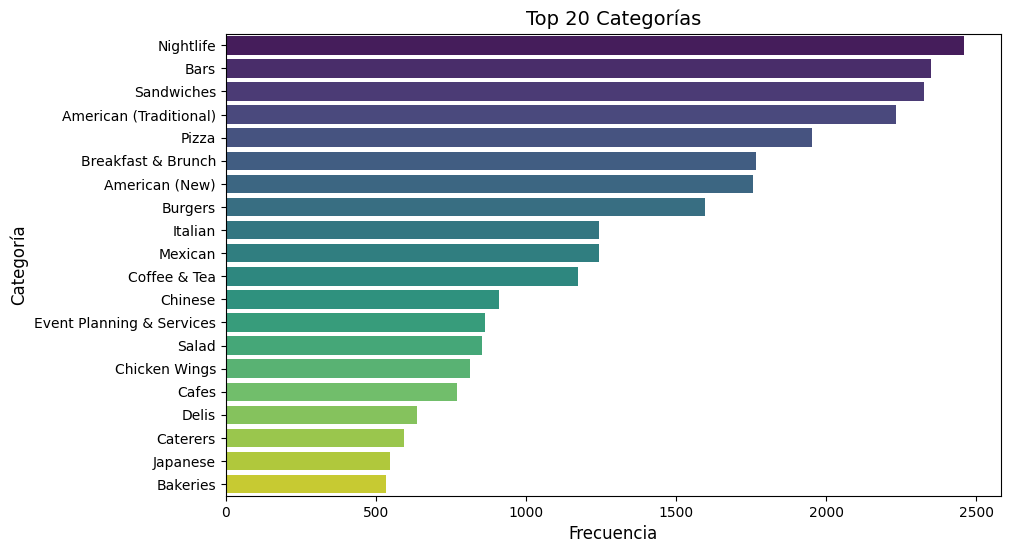

In [103]:
graficar_top_categorias(conteo_I)

In [104]:
rest_III = limpiar_categorias(rest_III, columna_categorias="categories", subcadena_excluir="rest")
rest_III = limpiar_categorias(rest_III, columna_categorias="categories", subcadena_excluir="food")

conteo_III = contar_categorias_y_promedios(rest_III, 'categories', 'stars_x')

conteo_III.head(20)

Categoría  Frecuencia  Promedio Valoraciones
0                   Nightlife        2200                    3.6
1                  Sandwiches        2116                    3.5
2                        Bars        2103                    3.6
3      American (Traditional)        2082                    3.4
4                       Pizza        1820                    3.4
5          Breakfast & Brunch        1593                    3.6
6              American (New)        1539                    3.6
7                     Burgers        1426                    2.9
8                     Mexican        1232                    3.5
9                     Italian        1229                    3.5
10               Coffee & Tea         981                    3.5
11                    Chinese         817                    3.4
12  Event Planning & Services         800                    3.7
13                      Salad         797                    3.6
14              Chicken Wings         748                    3.0
15                      Cafes         677                    4.0
16                      Delis         635                    3.6
17                   Caterers         532                    3.8
18                   Bakeries         478                    3.8
19                   Desserts         467                    3.9

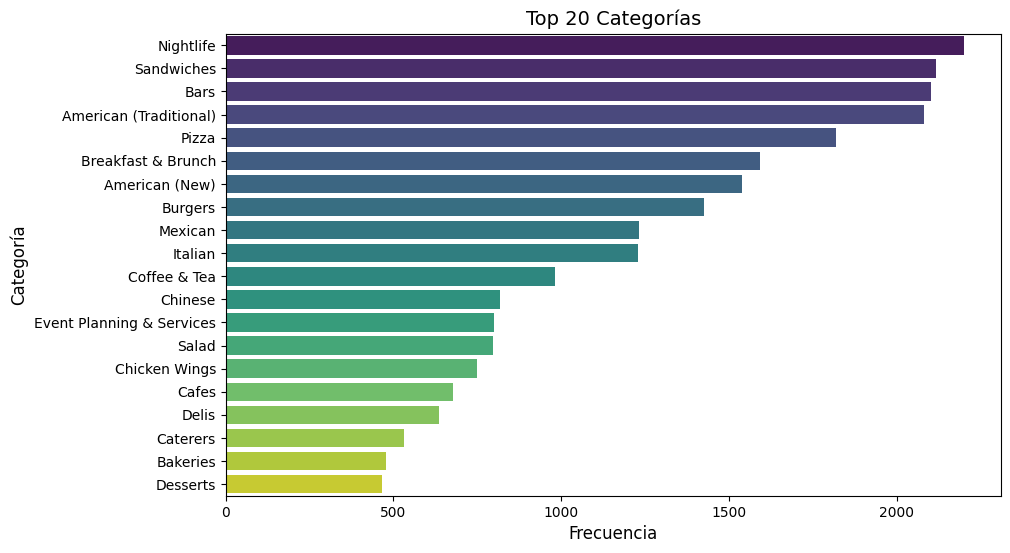

In [311]:
graficar_top_categorias(conteo_III)

In [105]:
rest_IV = limpiar_categorias(rest_IV, columna_categorias="categories", subcadena_excluir="rest")
rest_IV = limpiar_categorias(rest_IV, columna_categorias="categories", subcadena_excluir="food")

conteo_IV = contar_categorias_y_promedios(rest_IV, 'categories', 'stars_x')

conteo_IV.head(20)

Categoría  Frecuencia  Promedio Valoraciones
0                  Sandwiches         746                    3.6
1                   Nightlife         728                    3.6
2                        Bars         698                    3.6
3      American (Traditional)         693                    3.4
4                       Pizza         635                    3.4
5          Breakfast & Brunch         535                    3.6
6              American (New)         528                    3.6
7                     Burgers         465                    3.0
8                     Italian         381                    3.5
9                     Mexican         380                    3.6
10               Coffee & Tea         338                    3.6
11                    Chinese         287                    3.4
12  Event Planning & Services         266                    3.7
13                      Salad         264                    3.6
14              Chicken Wings         259                    3.0
15                      Cafes         241                    3.9
16                      Delis         210                    3.7
17                   Caterers         172                    3.8
18                   Japanese         158                    3.7
19                   Barbeque         151                    3.7

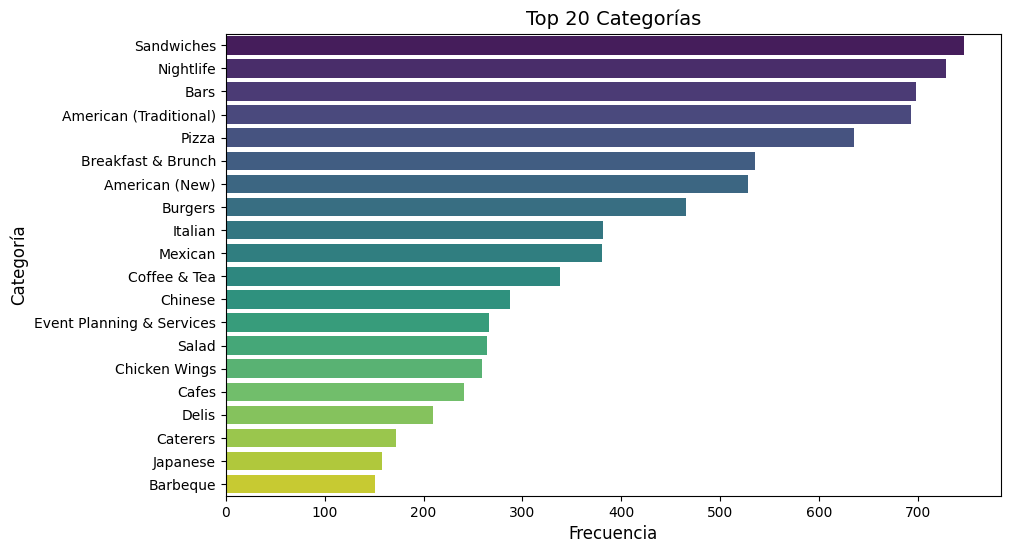

In [313]:
graficar_top_categorias(conteo_IV)

- La columna 'categories' necesita más procesamiento para agrupar las categorías similares

##  Calificaciones promedio por estado 

Objetivo: Identificar las regiones con mejores o peores calificaciones, para decidir dónde abrir nuevos locales.

In [110]:
def analizar_calificaciones_por_estado(dataframe):
    """
    Identifica las regiones (estados) con mejores y peores calificaciones
    para decidir dónde abrir nuevos locales, basado en las columnas 'state' y 'stars_x'.
    
    Parámetros:
        dataframe (pd.DataFrame): DataFrame que contiene las columnas 'state' y 'stars_x'.
        
    Retorna:
        pd.DataFrame: DataFrame con el promedio de calificación por estado.
    """
    # Asegurarse de que las columnas necesarias existan en el DataFrame
    columnas_requeridas = {'state', 'stars_x'}
    if not columnas_requeridas.issubset(dataframe.columns):
        raise ValueError(f"El DataFrame debe contener las columnas: {columnas_requeridas}")
    
    # Agrupar por estado y calcular el promedio de calificación
    calificaciones_por_estado = (
        dataframe.groupby('state')['stars_x']
        .mean()
        .reset_index()
        .sort_values(by='stars_x', ascending=False)
    )

    # Mostrar los estados con las mejores y peores calificaciones
    print("Promedios de calificación por estado:")
    print(calificaciones_por_estado)

    return calificaciones_por_estado


In [113]:
calificaciones_I = analizar_calificaciones_por_estado(rest_I)

Promedios de calificación por estado:
  state   stars_x
1    PA  3.512077
0    NJ  3.496082


In [111]:
calificaciones_III = analizar_calificaciones_por_estado(rest_III)

Promedios de calificación por estado:
  state   stars_x
0    FL  3.514155
1    TN  3.485900


In [112]:
calificaciones_IV = analizar_calificaciones_por_estado(rest_IV)

Promedios de calificación por estado:
  state   stars_x
0    CA  3.555188
1    NV  3.533927


## Filtrar restaurantes con calificaciones de 3, 4 y 5 estrellas

In [114]:
def filtrar_por_estrellas(dataframe, columna_estrellas, min_estrellas=3, max_estrellas=5):
    """
    Filtra un DataFrame para incluir solo las filas en las que la columna de calificaciones
    esté dentro del rango especificado (inclusive).

    Parámetros:
        dataframe (pd.DataFrame): El DataFrame a filtrar.
        columna_estrellas (str): Nombre de la columna que contiene las calificaciones.
        min_estrellas (int): Calificación mínima para el filtro (por defecto, 3).
        max_estrellas (int): Calificación máxima para el filtro (por defecto, 5).

    Retorna:
        pd.DataFrame: DataFrame filtrado con las filas que cumplen el criterio.
    """
    # Verificar que la columna exista
    if columna_estrellas not in dataframe.columns:
        raise ValueError(f"La columna '{columna_estrellas}' no está presente en el DataFrame.")
    
    # Filtrar los datos
    filtrado = dataframe[dataframe[columna_estrellas].between(min_estrellas, max_estrellas)]
    
    return filtrado


In [115]:
rest_I = filtrar_por_estrellas(rest_I, 'stars_x')

In [116]:
restaurantes_I = filtrar_por_estrellas(restaurantes_I, 'stars_x')

In [117]:
rest_III = filtrar_por_estrellas(rest_III, 'stars_x')

In [118]:
restaurantes_III = filtrar_por_estrellas(restaurantes_III, 'stars_x')

In [119]:
rest_IV = filtrar_por_estrellas(rest_IV, 'stars_x')

In [120]:
restaurantes_IV = filtrar_por_estrellas(restaurantes_IV, 'stars_x')

## Nube de palabras de la columna 'categories'

In [58]:
def generar_nube_categorias(dataframe):
    """
    Genera una nube de palabras a partir de la columna 'categories' de un dataframe.
    Asegura que los datos de 'categories' sean procesados como listas de palabras.

    Parámetros:
        dataframe (pd.DataFrame): Dataframe con una columna llamada 'categories'.
        
    Retorna:
        None: Muestra una nube de palabras generada a partir de las categorías.
    """
    # Asegurarse de que la columna 'categories' esté en el dataframe
    if 'categories' not in dataframe.columns:
        raise ValueError("El dataframe no contiene la columna 'categories'.")

    # Asegurarse de que todas las entradas de la columna 'categories' sean listas
    dataframe.loc[:, 'categories'] = dataframe['categories'].apply(
        lambda x: x if isinstance(x, list) else ([str(x)] if pd.notna(x) else [])
    )

    # Inicializar una cadena para acumular todas las categorías
    categories_list = ' '.join(dataframe['categories'].apply(lambda x: ' '.join(x)))

    # Verificar si categories_list tiene palabras válidas antes de generar la nube
    if categories_list.strip():  # Solo generar la nube si hay contenido
        # Generar la nube de palabras
        wordcloud = WordCloud(
            width=800, 
            height=400, 
            background_color='white', 
            colormap='viridis'
        ).generate(categories_list)

        # Mostrar la nube de palabras
        plt.figure(figsize=(10, 6))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')  # Desactivar los ejes
        plt.title('Nube de palabras de las categorías', fontsize=14)
        plt.show()
    else:
        print("No hay palabras válidas para generar la nube de palabras.")


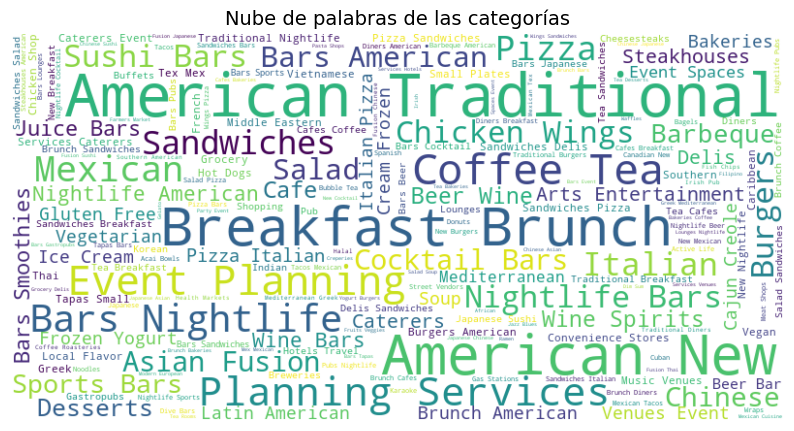

In [48]:
generar_nube_categorias(rest_I)


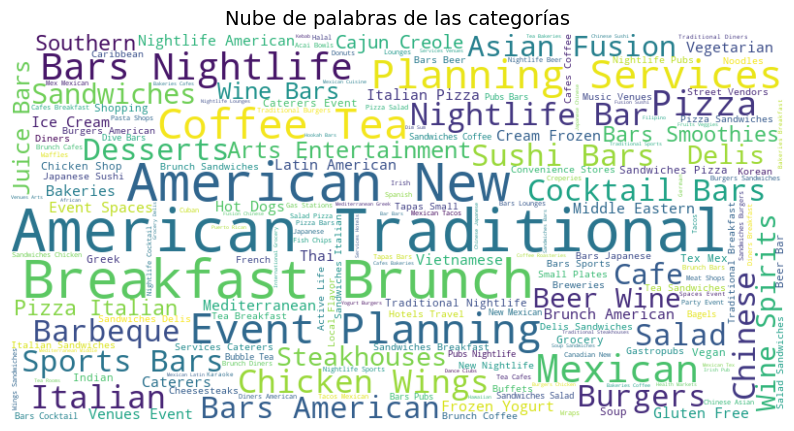

In [336]:
generar_nube_categorias(rest_III)

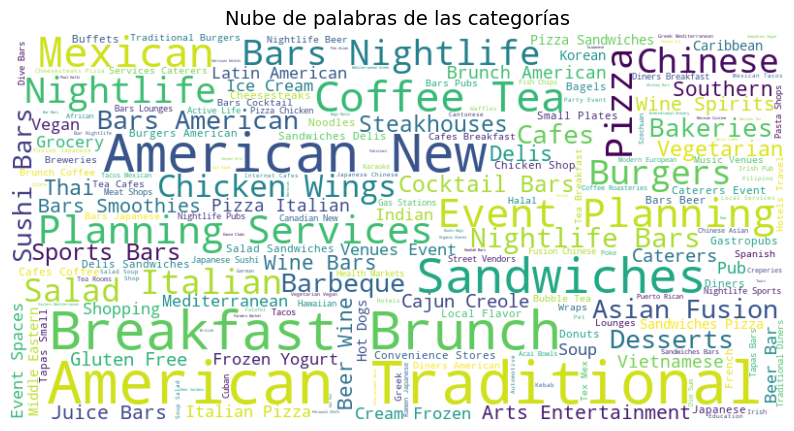

In [337]:
generar_nube_categorias(rest_IV)

##  Mapa de calor de correlaciones

Objetivo: Explorar la relación entre variables numéricas, como la cantidad de reseñas, calificaciones y reacciones (útil, gracioso, genial).


In [393]:
def graficar_mapa_calor_correlacion(df, columnas_correlacion):
    """
    Genera un mapa de calor de correlaciones entre las columnas especificadas en el DataFrame.

    Parámetros:
        df (pd.DataFrame): El DataFrame que contiene las columnas para calcular las correlaciones.
        columnas_correlacion (list): Lista de nombres de columnas para calcular la correlación.

    Retorna:
        None. Muestra el mapa de calor de correlaciones.
    """
    # Asegurarse de que las columnas existan en el DataFrame
    if not all(col in df.columns for col in columnas_correlacion):
        raise ValueError(f"Algunas columnas no están presentes en el DataFrame: {columnas_correlacion}")

    # Calcular la matriz de correlaciones
    corr = df[columnas_correlacion].corr()

    # Configurar el gráfico
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title('Mapa de calor de correlaciones', fontsize=14)
    plt.show()


Mapa de calor de interacciones en reseñas
Objetivo: Analizar cómo las interacciones de las reseñas (útil, divertido, genial) se relacionan con la calificación promedio.
Variables:
stars_y (calificación de la reseña individual)
useful, funny, cool
Insight: Ver qué características de las reseñas tienden a estar más relacionadas con calificaciones altas.

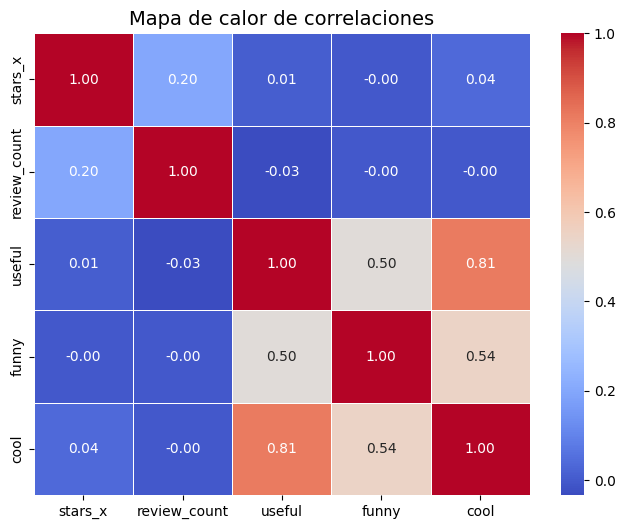

In [396]:
graficar_mapa_calor_correlacion(restaurantes_I, ['stars_x', 'review_count', 'useful', 'funny', 'cool'])


- *La relación entre la cantidad de reviews y el promedio de valoraciones es baja.*

In [125]:

def mapa_volumen_y_calificaciones(df, columna_fecha='date', columna_calificacion='stars_x', rango_anios=None):
    """
    Crea un gráfico combinado para mostrar el volumen de reseñas y las calificaciones promedio por mes.

    Parámetros:
    - df: DataFrame con los datos.
    - columna_fecha: Nombre de la columna con las fechas (debe ser tipo datetime).
    - columna_calificacion: Nombre de la columna con las calificaciones.
    - rango_anios: Tupla opcional (inicio, fin) para filtrar por un rango de años.

    Devuelve:
    - Un gráfico dual con volumen de reseñas y calificaciones promedio por mes.
    """
    # Convertir la columna de fechas a tipo datetime si no lo está
    if not pd.api.types.is_datetime64_any_dtype(df[columna_fecha]):
        df[columna_fecha] = pd.to_datetime(df[columna_fecha], errors='coerce')

    # Eliminar valores nulos de fecha o calificación
    df = df.dropna(subset=[columna_fecha, columna_calificacion])

    # Filtrar por rango de años, si se especifica
    if rango_anios:
        inicio, fin = rango_anios
        df = df[(df[columna_fecha].dt.year >= inicio) & (df[columna_fecha].dt.year <= fin)]

    # Crear columna para agrupar por mes/año
    df['mes_anio'] = df[columna_fecha].dt.to_period('M')

    # Calcular volumen de reseñas por mes/año
    volumen = df.groupby('mes_anio')[columna_calificacion].count()

    # Calcular calificaciones promedio por mes/año
    promedio_calificaciones = df.groupby('mes_anio')[columna_calificacion].mean()

    # Crear gráfico dual
    fig, ax1 = plt.subplots(figsize=(14, 7))

    # Gráfico de volumen (eje izquierdo)
    ax1.bar(volumen.index.astype(str), volumen, color='skyblue', alpha=0.7, label='Volumen de reseñas')
    ax1.set_xlabel('Mes/Año', fontsize=12)
    ax1.set_ylabel('Volumen de Reseñas', fontsize=12, color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.set_xticks(range(0, len(volumen), max(1, len(volumen) // 12)))  # Reducir densidad de etiquetas
    ax1.set_xticklabels(volumen.index[::max(1, len(volumen) // 12)].astype(str), rotation=45, fontsize=10)

    # Gráfico de calificaciones (eje derecho)
    ax2 = ax1.twinx()
    ax2.plot(promedio_calificaciones.index.astype(str), promedio_calificaciones, color='orange', marker='o', label='Calificación Promedio')
    ax2.set_ylabel('Calificación Promedio', fontsize=12, color='orange')
    ax2.tick_params(axis='y', labelcolor='orange')

    # Agregar leyendas
    ax1.legend(loc='upper left', bbox_to_anchor=(0.1, 1), fontsize=12)
    ax2.legend(loc='upper right', bbox_to_anchor=(0.9, 1), fontsize=12)

    # Títulos y ajustes finales
    plt.title('Volumen de Reseñas y Calificaciones Promedio por Mes/Año', fontsize=16)
    plt.grid(alpha=0.4)
    plt.tight_layout()
    plt.show()




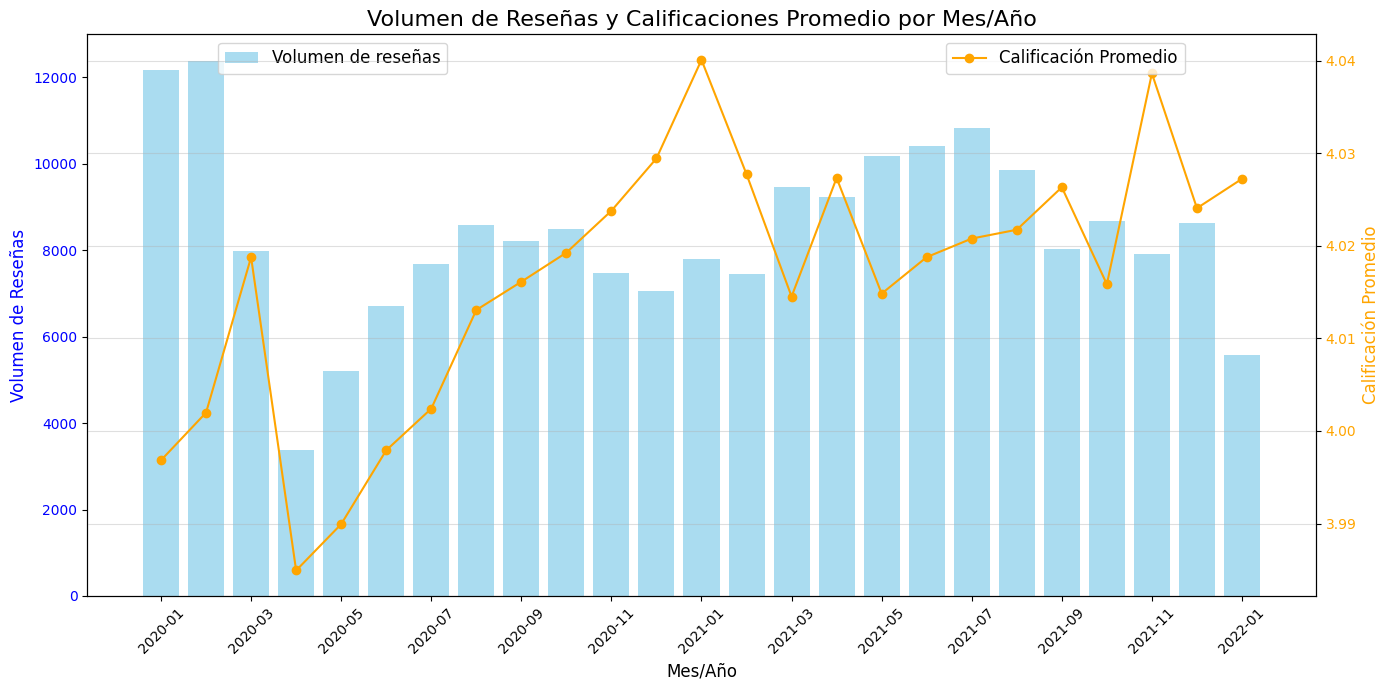

In [410]:

mapa_volumen_y_calificaciones(restaurantes_I, rango_anios=(2020, 2024))

- Segmentación:

Se muestra un volumen acumulado para destacar la evolución en el tiempo.

- Análisis de estacionalidad:

Usar statsmodels para identificar patrones recurrentes (meses con más actividad o mejores calificaciones)

In [412]:
from statsmodels.tsa.seasonal import seasonal_decompose

def mapa_volumen_y_calificaciones(df, columna_fecha='date', columna_calificacion='stars_x', rango_anios=None):
    """
    Crea un gráfico combinado que muestra:
    - Volumen de reseñas por mes
    - Calificación promedio por mes
    - Volumen acumulativo
    - Análisis de estacionalidad

    Parámetros:
    - df: DataFrame con los datos.
    - columna_fecha: Nombre de la columna con las fechas (debe ser tipo datetime).
    - columna_calificacion: Nombre de la columna con las calificaciones.
    - rango_anios: Tupla opcional (inicio, fin) para filtrar por un rango de años.

    Devuelve:
    - Un gráfico combinado y un análisis de estacionalidad.
    """
    # Convertir la columna de fechas a tipo datetime si no lo está
    if not pd.api.types.is_datetime64_any_dtype(df[columna_fecha]):
        df[columna_fecha] = pd.to_datetime(df[columna_fecha], errors='coerce')

    # Eliminar valores nulos de fecha o calificación
    df = df.dropna(subset=[columna_fecha, columna_calificacion])

    # Filtrar por rango de años, si se especifica
    if rango_anios:
        inicio, fin = rango_anios
        df = df[(df[columna_fecha].dt.year >= inicio) & (df[columna_fecha].dt.year <= fin)]

    # Crear columna para agrupar por mes/año
    df['mes_anio'] = df[columna_fecha].dt.to_period('M')

    # Calcular métricas por mes/año
    volumen = df.groupby('mes_anio')[columna_calificacion].count()
    promedio_calificaciones = df.groupby('mes_anio')[columna_calificacion].mean()
    volumen_acumulativo = volumen.cumsum()

    # Crear gráfico combinado
    fig, ax1 = plt.subplots(figsize=(14, 7))

    # Gráfico de volumen (eje izquierdo)
    ax1.bar(volumen.index.astype(str), volumen, color='skyblue', alpha=0.7, label='Volumen de reseñas')
    ax1.set_xlabel('Mes/Año', fontsize=12)
    ax1.set_ylabel('Volumen de Reseñas', fontsize=12, color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.set_xticks(range(0, len(volumen), max(1, len(volumen) // 12)))  # Reducir densidad de etiquetas
    ax1.set_xticklabels(volumen.index[::max(1, len(volumen) // 12)].astype(str), rotation=45, fontsize=10)

    # Gráfico de calificaciones (eje derecho)
    ax2 = ax1.twinx()
    ax2.plot(promedio_calificaciones.index.astype(str), promedio_calificaciones, color='orange', marker='o', label='Calificación Promedio')
    ax2.set_ylabel('Calificación Promedio', fontsize=12, color='orange')
    ax2.tick_params(axis='y', labelcolor='orange')

    # Gráfico de volumen acumulativo (línea)
    ax1.plot(volumen_acumulativo.index.astype(str), volumen_acumulativo, color='green', linestyle='--', label='Volumen acumulativo')

    # Agregar leyendas
    ax1.legend(loc='upper left', bbox_to_anchor=(0.1, 1), fontsize=12)
    ax2.legend(loc='upper right', bbox_to_anchor=(0.9, 1), fontsize=12)

    # Títulos y ajustes finales
    plt.title('Volumen de Reseñas, Calificaciones Promedio y Volumen Acumulativo', fontsize=16)
    plt.grid(alpha=0.4)
    plt.tight_layout()
    plt.show()

    # Análisis de estacionalidad
    print("\nAnálisis de Estacionalidad:")
    volumen_mes_anio = volumen.to_timestamp()
    decomposition = seasonal_decompose(volumen_mes_anio, model='additive', period=12)
    
    # Graficar componentes de estacionalidad
    decomposition.plot()
    plt.suptitle('Descomposición Estacional del Volumen de Reseñas', fontsize=16)
    plt.tight_layout()
    plt.show()

    return decomposition


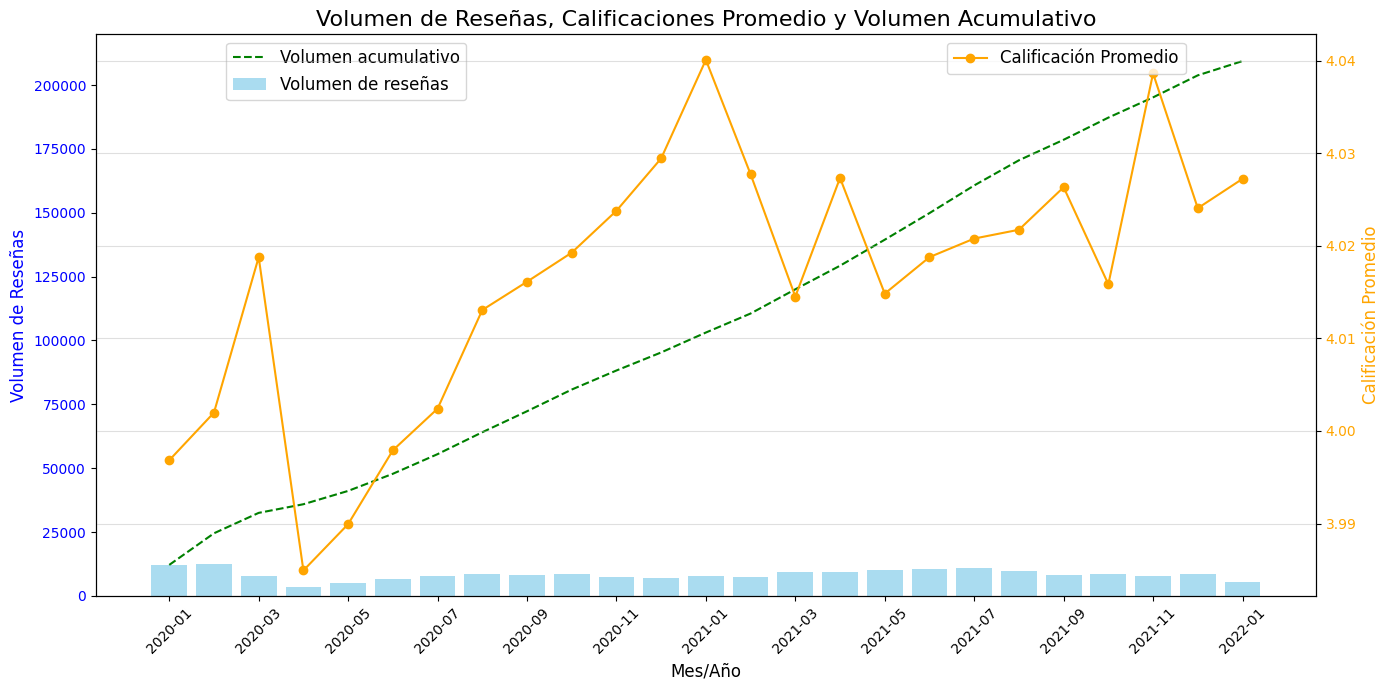


Análisis de Estacionalidad:


In [413]:

resultado = mapa_volumen_y_calificaciones(restaurantes_I, rango_anios=(2020, 2024))

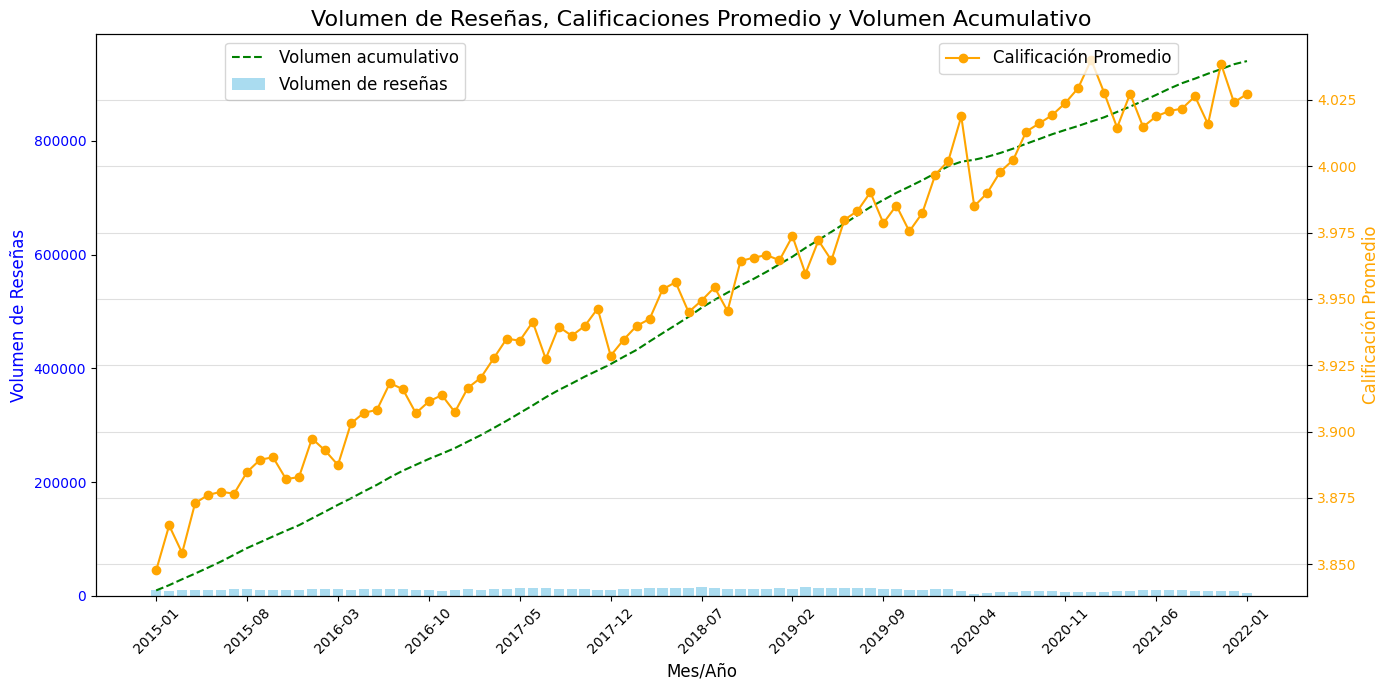


Análisis de Estacionalidad:


In [414]:
resultado = mapa_volumen_y_calificaciones(restaurantes_I, rango_anios=(2015, 2024))

Tendencia: Identifica cambios a largo plazo.

Estacionalidad: Patrones recurrentes (e.g., picos en ciertos meses).

Ruido residual: Variaciones no explicadas.

In [50]:
def analizar_volumen_usuarios_unicos(df, columna_fecha='date', columna_usuario='user_id', año_inicio=None):
    """
    Analiza el volumen de usuarios únicos por mes y lo cruza con el volumen total de reseñas,
    con la opción de filtrar a partir de un año específico.
    
    Parámetros:
    - df (DataFrame): Dataset que contiene las columnas con la fecha y los usuarios.
    - columna_fecha (str): Nombre de la columna que contiene las fechas. Por defecto es 'date'.
    - columna_usuario (str): Nombre de la columna que contiene los IDs de usuario. Por defecto es 'user_id'.
    - año_inicio (int): Año a partir del cual se analizarán los datos. Si es None, se analizarán todos los años.
    
    Retorno:
    - Visualización de la relación entre volumen de reseñas y usuarios únicos por mes.
    - DataFrame con el resumen del análisis.
    """
    # Hacer una copia del DataFrame para evitar el warning
    df = df.copy()
    
    # Convertir columna de fecha a formato datetime
    df[columna_fecha] = pd.to_datetime(df[columna_fecha])
    
    # Filtrar por el año de inicio si se especifica
    if año_inicio is not None:
        df = df[df[columna_fecha].dt.year >= año_inicio]
    
    # Crear columna año-mes
    df['year_month'] = df[columna_fecha].dt.to_period('M')
    
    # Calcular volumen total de reseñas por mes
    volumen_reseñas = df.groupby('year_month').size()
    
    # Calcular usuarios únicos por mes
    usuarios_unicos = df.groupby('year_month')[columna_usuario].nunique()
    
    # Crear un DataFrame con ambos resultados
    resumen = pd.DataFrame({
        'volumen_reseñas': volumen_reseñas,
        'usuarios_unicos': usuarios_unicos
    })
    
    # Calcular la proporción de reseñas por usuario único
    resumen['reseñas_por_usuario'] = resumen['volumen_reseñas'] / resumen['usuarios_unicos']
    
    # Graficar
    plt.figure(figsize=(14, 7))
    plt.plot(resumen.index.astype(str), resumen['volumen_reseñas'], label='Volumen de reseñas', marker='o')
    plt.plot(resumen.index.astype(str), resumen['usuarios_unicos'], label='Usuarios únicos', marker='o')
    plt.xticks(rotation=45)
    plt.title('Volumen de Reseñas y Usuarios Únicos por Mes', fontsize=16)
    plt.xlabel('Fecha (Año-Mes)', fontsize=12)
    plt.ylabel('Volumen', fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    # Graficar reseñas promedio por usuario único
    plt.figure(figsize=(14, 5))
    plt.plot(resumen.index.astype(str), resumen['reseñas_por_usuario'], label='Reseñas por Usuario Único', marker='o', color='green')
    plt.xticks(rotation=45)
    plt.title('Promedio de Reseñas por Usuario Único', fontsize=16)
    plt.xlabel('Fecha (Año-Mes)', fontsize=12)
    plt.ylabel('Promedio de Reseñas', fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    return resumen


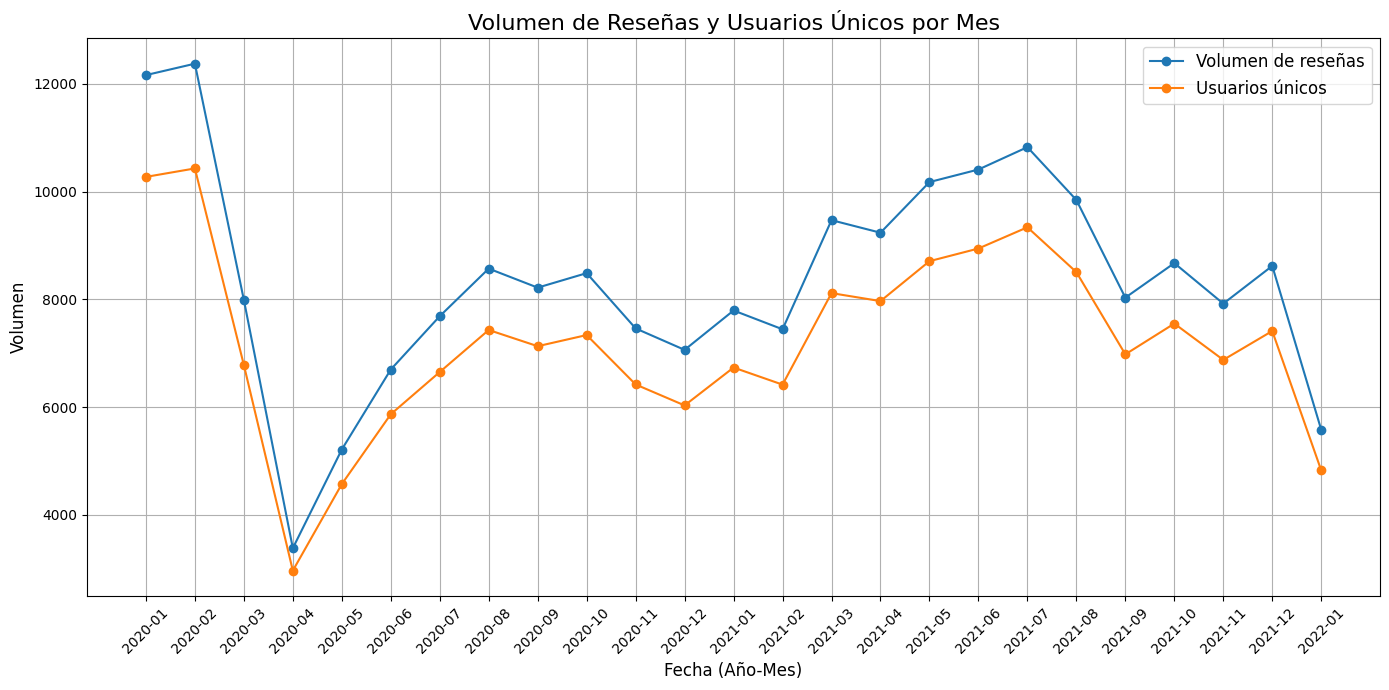

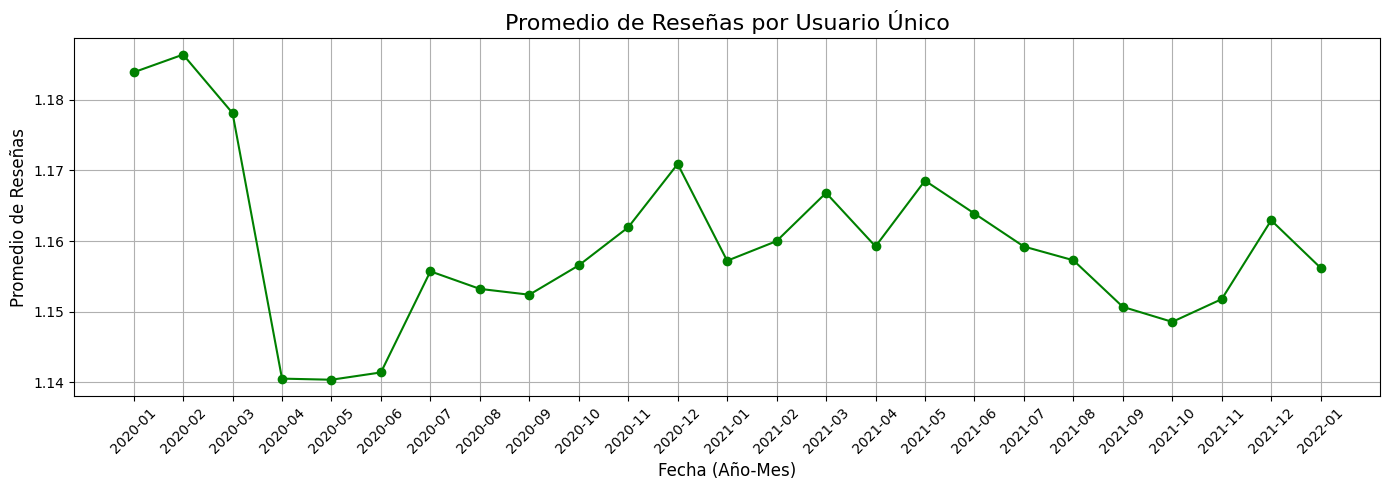

            volumen_reseñas  usuarios_unicos  reseñas_por_usuario
year_month                                                       
2020-01               12163            10274             1.183862
2020-02               12375            10431             1.186368
2020-03                7991             6783             1.178092
2020-04                3384             2967             1.140546
2020-05                5215             4573             1.140389


In [420]:
# Llamada a la función para analizar datos desde 2020
resultado = analizar_volumen_usuarios_unicos(restaurantes_I, columna_fecha='date', columna_usuario='user_id', año_inicio=2020)

# Inspeccionar el resumen generado
print(resultado.head())


## Ubicaciones de negocios en un mapa geográfico 

Objetivo: Identificar concentración de negocios en áreas específicas.

Visualización: Mapa geográfico con latitud y longitud.

In [ ]:

def crear_mapa_de_calor(df):
    # Verificar si las columnas 'latitude' y 'longitude' existen
    if 'latitude' not in df.columns or 'longitude' not in df.columns:
        raise ValueError("El DataFrame debe contener las columnas 'latitude' y 'longitude'.")
    
    # Filtrar datos nulos de latitud y longitud
    df_limpio = df[['latitude', 'longitude']].dropna()
    
    # Verificar si hay suficientes datos
    if len(df_limpio) == 0:
        raise ValueError("No hay datos válidos de coordenadas para crear el mapa de calor.")
    
    # Crear un mapa base centrado en el promedio de latitudes y longitudes
    mapa = folium.Map(location=[df_limpio['latitude'].mean(), df_limpio['longitude'].mean()], zoom_start=10)
    
    # Crear los datos del mapa de calor
    heat_data = df_limpio.values.tolist()  # Convertir las coordenadas a una lista de listas
    
    # Crear el mapa de calor
    HeatMap(heat_data, radius=15).add_to(mapa)
    
    # Mostrar mapa interactivo
    return mapa


In [ ]:

mapa_calor = crear_mapa_de_calor(rest_I)

mapa_calor


## Tendencia temporal de las reseñas

Objetivo: Analizar cómo han cambiado las reseñas con el tiempo, por ejemplo, si hay temporadas con más actividad.

Visualización: Serie temporal de la cantidad de reseñas por mes o año.

In [362]:

def graficar_tendencia_reseñas(df, columna_fecha='date'):
    """
    Función que convierte la columna de fecha a datetime, 
    agrega una columna de año-mes (ignorando la hora),
    cuenta las reseñas por mes, y genera un gráfico de línea con la tendencia temporal de las reseñas.
    
    Parámetros:
    df (DataFrame): El dataframe que contiene la columna de fecha y las reseñas.
    columna_fecha (str): El nombre de la columna de fecha. Por defecto es 'date'.
    """
    # Asegurarse de que el dataframe no sea una vista
    df = df.copy()

    # Convertir la columna de fecha a datetime, esto maneja tanto la fecha como la hora
    df.loc[:, columna_fecha] = pd.to_datetime(df[columna_fecha])

    # Crear columna año-mes, solo usando la parte de la fecha (año y mes)
    df.loc[:, 'year_month'] = df[columna_fecha].dt.to_period('M')

    # Conteo de reseñas por mes
    reviews_per_month = df.groupby('year_month').size()

    # Graficar la tendencia temporal de las reseñas
    plt.figure(figsize=(12, 6))
    reviews_per_month.plot(kind='line', color='blue')
    plt.title('Tendencia temporal de las reseñas', fontsize=14)
    plt.xlabel('Fecha (Año-Mes)', fontsize=12)
    plt.ylabel('Cantidad de reseñas', fontsize=12)
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.show()



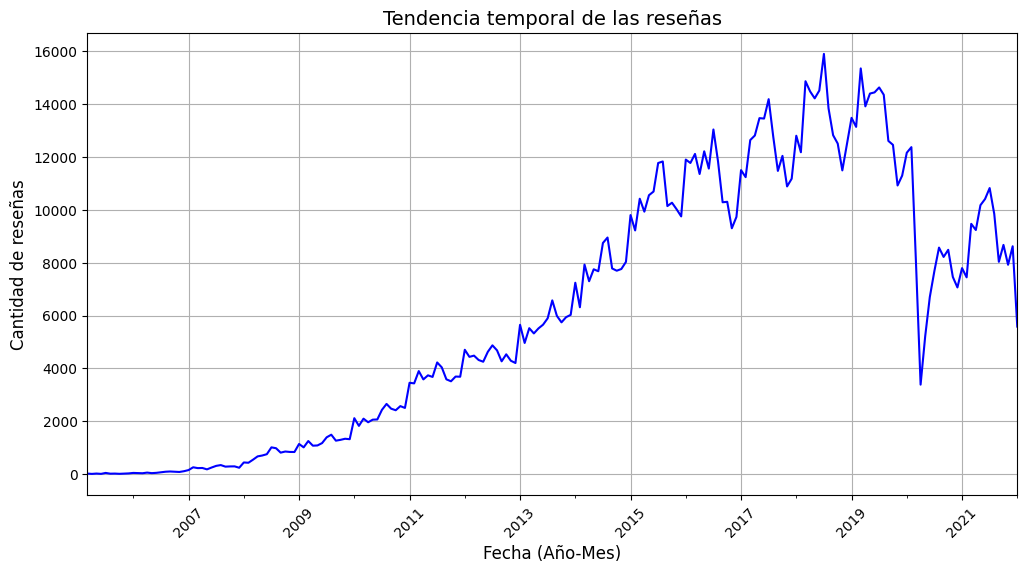

In [363]:
# Suponiendo que 'df' es tu DataFrame con una columna 'date' que contiene fechas y horas
graficar_tendencia_reseñas(restaurantes_I)


## Palabras más frecuentes en las reseñas (NLP básico) 

Objetivo: Descubrir qué aspectos destacan los usuarios en las reseñas (positivos o negativos).

Visualización: Nube de palabras.

In [366]:
print(restaurantes_I['text'].apply(type).value_counts())

text
<class 'str'>    1255018
Name: count, dtype: int64


In [49]:
restaurantes_I['text'] = restaurantes_I['text'].astype(str)


In [ ]:

def graficar_nube_palabras_por_rango(df, columna_texto='text', columna_valoracion='stars_x'):
    """
    Función que genera y grafica una nube de palabras de las reseñas, agrupando las reseñas
    en dos rangos de calificación: de 3 a 3.5 y de 4.5 a 5.
    
    Parámetros:
    df (DataFrame): El dataframe que contiene las reseñas y las valoraciones.
    columna_texto (str): El nombre de la columna de reseñas. Por defecto es 'text'.
    columna_valoracion (str): El nombre de la columna de valoraciones. Por defecto es 'stars_x'.
    """
    # Filtrar el dataframe por los dos rangos de calificación
    rango_1 = df[(df[columna_valoracion] >= 3) & (df[columna_valoracion] < 3.5)]
    rango_2 = df[(df[columna_valoracion] >= 4.5) & (df[columna_valoracion] <= 5)]

    # Unir todas las reseñas en un solo texto para cada rango
    texto_rango_1 = " ".join(rango_1[columna_texto].dropna())
    texto_rango_2 = " ".join(rango_2[columna_texto].dropna())

    # Crear la nube de palabras para cada rango de calificación
    wordcloud_1 = WordCloud(stopwords=ENGLISH_STOP_WORDS, width=800, height=400, background_color='white').generate(texto_rango_1)
    wordcloud_2 = WordCloud(stopwords=ENGLISH_STOP_WORDS, width=800, height=400, background_color='white').generate(texto_rango_2)

    # Graficar las nubes de palabras
    plt.figure(figsize=(14, 7))

    # Nube de palabras para el primer rango (3 a 3.5)
    plt.subplot(1, 2, 1)
    plt.imshow(wordcloud_1, interpolation='bilinear')
    plt.axis('off')
    plt.title('Nube de Palabras para Valoración de 3 a 3.5', fontsize=14)

    # Nube de palabras para el segundo rango (4.5 a 5)
    plt.subplot(1, 2, 2)
    plt.imshow(wordcloud_2, interpolation='bilinear')
    plt.axis('off')
    plt.title('Nube de Palabras para Valoración de 4.5 a 5', fontsize=14)

    plt.tight_layout()
    plt.show()


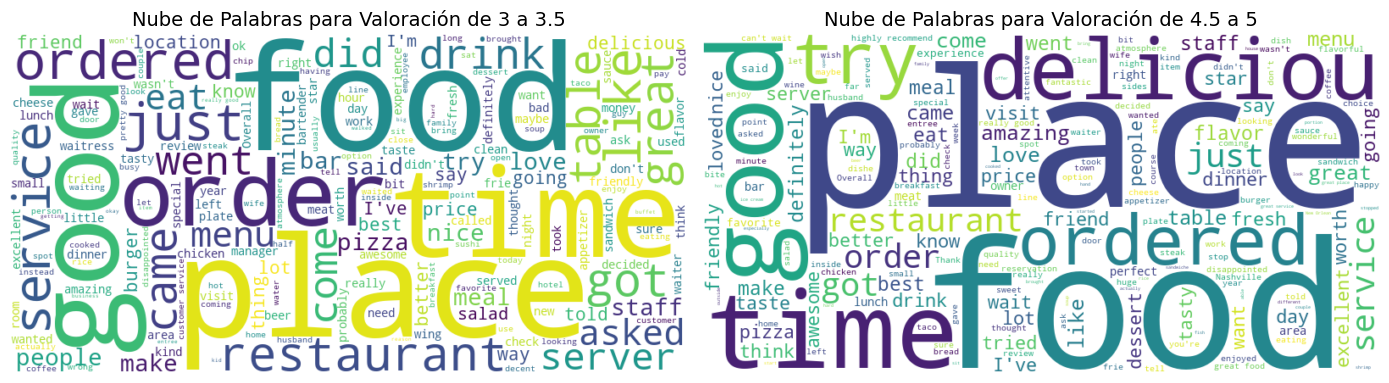

In [53]:
graficar_nube_palabras_por_rango(restaurantes_I)


In [370]:
graficar_nube_palabras_por_rango(restaurantes_III)

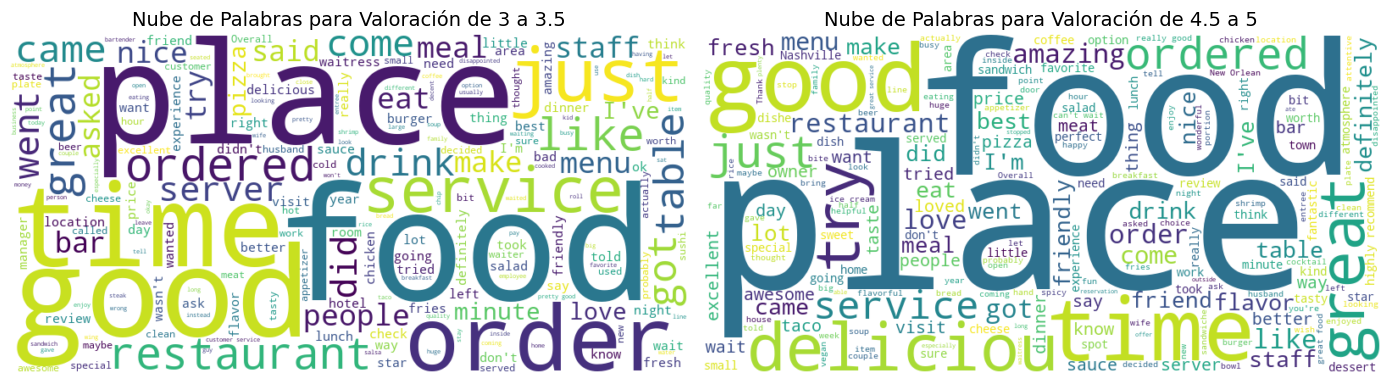

In [371]:
graficar_nube_palabras_por_rango(restaurantes_IV)

In [54]:
len(restaurantes_I)

1255018

In [55]:
len(restaurantes_III)

1112496

In [56]:
len(restaurantes_IV)

385411

## Se conservarán solo los datos post pandemia

In [63]:
def contar_datos_desde_anio(df, columna_fecha='date', columna_business_id='business_id', anio_corte=2020):
    """
    Cuenta cuántos datos en el DataFrame tienen fechas a partir de un año específico
    y también muestra la cantidad de valores únicos de `business_id` desde ese año.
    
    Parámetros:
    df (DataFrame): El DataFrame que contiene la columna de fechas y `business_id`.
    columna_fecha (str): El nombre de la columna que contiene las fechas. Por defecto es 'date'.
    columna_business_id (str): El nombre de la columna que contiene los IDs de negocio. Por defecto es 'business_id'.
    anio_corte (int): El año a partir del cual se cuentan los datos. Por defecto es 2020.
    """
    # Asegurarse de no modificar el DataFrame original
    df_copia = df.copy()

    # Convertir la columna de fecha a tipo datetime si no lo está
    df_copia[columna_fecha] = pd.to_datetime(df_copia[columna_fecha], errors='coerce')
    
    # Crear una fecha límite basada en el año de corte
    fecha_corte = pd.Timestamp(f'{anio_corte}-01-01')
    
    # Filtrar los datos a partir de la fecha de corte
    datos_desde_anio = df_copia[df_copia[columna_fecha] >= fecha_corte]
    
    # Calcular la cantidad de datos desde el año de corte
    cantidad_datos = len(datos_desde_anio)
    
    # Calcular la cantidad de valores únicos de `business_id` entre esos datos
    cantidad_business_id_unicos = datos_desde_anio[columna_business_id].nunique()
    
    # Imprimir la información de manera explícita
    print(f"Cantidad total de datos con fecha desde {anio_corte}: {cantidad_datos}")
    print(f"Cantidad de valores únicos de 'business_id' desde {anio_corte}: {cantidad_business_id_unicos}")


In [52]:
# Llamada a la función para contar datos desde 2020
contar_datos_desde_anio(restaurantes_I, columna_fecha='date', columna_business_id='business_id', anio_corte=2020)

Cantidad total de datos con fecha desde 2020: 209363
Cantidad de valores únicos de 'business_id' desde 2020: 8223


In [64]:
contar_datos_desde_anio(restaurantes_I, columna_fecha='date', columna_business_id='business_id', anio_corte=2021)

Cantidad total de datos con fecha desde 2021: 114042
Cantidad de valores únicos de 'business_id' desde 2021: 7239


In [427]:
contar_datos_desde_anio(restaurantes_III, columna_fecha='date', columna_business_id='business_id', anio_corte=2021)

Cantidad total de datos con fecha desde 2021: 100531
Cantidad de valores únicos de 'business_id' desde 2021: 6682


In [426]:
contar_datos_desde_anio(restaurantes_IV, columna_fecha='date', columna_business_id='business_id', anio_corte=2021)

Cantidad total de datos con fecha desde 2022: 4684
Cantidad de valores únicos de 'business_id' desde 2022: 2332


## Se filtra a partir del año 2021

In [65]:

def filtrar_por_anio(df, columna_fecha='date', anio_filtro=2020):
    """
    Filtra las filas de un DataFrame para seleccionar solo las que corresponden a un año específico
    y resetea los índices del DataFrame resultante.

    Parámetros:
    df (DataFrame): El DataFrame que contiene la columna de fechas.
    columna_fecha (str): El nombre de la columna que contiene las fechas. Por defecto es 'date'.
    anio_filtro (int): El año que se utilizará para filtrar las filas. Por defecto es 2020.

    Retorna:
    DataFrame: Un DataFrame filtrado que contiene solo las filas del año especificado con los índices reseteados.
    """
    # Asegurarse de no modificar el DataFrame original
    df_copia = df.copy()

    # Convertir la columna de fecha a tipo datetime si no lo está
    df_copia[columna_fecha] = pd.to_datetime(df_copia[columna_fecha], errors='coerce')
    
    # Filtrar las filas que corresponden al año especificado
    df_filtrado = df_copia[df_copia[columna_fecha].dt.year == anio_filtro]
    
    # Resetear los índices del DataFrame filtrado
    df_filtrado.reset_index(drop=True, inplace=True)
    
    # Retornar el DataFrame filtrado con los índices reseteados
    return df_filtrado


In [66]:
restaurantes_I_2021 = filtrar_por_anio(restaurantes_I, columna_fecha='date', anio_filtro=2021)

In [67]:
restaurantes_III_2021 = filtrar_por_anio(restaurantes_III, columna_fecha='date', anio_filtro=2021)

In [68]:
restaurantes_IV_2021 = filtrar_por_anio(restaurantes_IV, columna_fecha='date', anio_filtro=2021)

## Limpieza de la columna 'categories'

 Preprocesamiento de las categorías :

- Extraer categorías únicas

- Generar diccionario de mapeo

- Aplicar el mapeo de categorías

In [197]:
rest_I_cat = rest_I.copy()

In [ ]:
rest_I_cat

In [ ]:
#pd.set_option('display.max_rows', None)

- Se extraen categorías únicas de la columna categories.

In [198]:
unique_categories = set(cat.strip().lower() for sublist in rest_I_cat['categories'] for cat in sublist)
unique_categories = sorted(unique_categories)


In [199]:
unique_categories

['acai bowls',
 'accessories',
 'active life',
 'adult entertainment',
 'afghan',
 'african',
 'airport lounges',
 'airports',
 'amateur sports teams',
 'american (new)',
 'american (traditional)',
 'amusement parks',
 'antiques',
 'apartments',
 'arabic',
 'arcades',
 'argentine',
 'armenian',
 'art galleries',
 'arts & crafts',
 'arts & entertainment',
 'asian fusion',
 'auction houses',
 'audio/visual equipment rental',
 'australian',
 'austrian',
 'auto detailing',
 'auto repair',
 'automotive',
 'axe throwing',
 'bagels',
 'bakeries',
 'bangladeshi',
 'banks & credit unions',
 'barbeque',
 'barbers',
 'bars',
 'bartenders',
 'basque',
 'beaches',
 'beauty & spas',
 'bed & breakfast',
 'beer',
 'beer bar',
 'beer gardens',
 'beer hall',
 'beer tours',
 'belgian',
 'beverage store',
 'bike rentals',
 'bike repair/maintenance',
 'bikes',
 'bistros',
 'boat charters',
 'boat tours',
 'boating',
 'bocce ball',
 'books',
 'bookstores',
 'botanical gardens',
 'bowling',
 'brasseries',
 '

## Diccionario inicial category_map para mapear categorías

In [200]:

category_map_initial = {
    "Nightlife": [
        "bars", "nightlife", "beer", "sports bars", "clubs", "dive bars", "irish pub", 
        "cocktail bars", "lounges", "pubs", "beer & wine", "music venues", "pool halls", 
        "jazz & blues", "dance clubs"
    ],
    "Food": ["desserts", "wraps", "salad", "sandwiches", "pizza", "burgers", "bbq", "chicken wings", 
        "tacos", "hot dogs", "acai bowls", "soups", "ice cream", "frozen yogurt", "delis", 
        "caterers", "smoothies", "breakfast & brunch", "juice bars","vegan", "vegetarian",
        "halal", "gastro pubs", "gastropubs", "gluten-free"
    ],
    "Cuisine": [
        "mexican", "italian", "chinese", "japanese", "indian", "mediterranean", "southern", 
        "vegetarian", "american", "asian fusion", "thai", "sushi", "colombian", 
        "french", "greek", "turkish", "russian", "ukrainian", "spanish", "ethiopian",  "italian"
    ],
    "Other": [
        "grocery", "arts & entertainment", "local flavor", "shopping", "active life", "cinema", 
        "arcades", "venues & event spaces", "event planning & services", "international grocery",
        "wine bars", "catering", "event planning", "boating", "pools", "venues", "mini golf", 
        "bowling", "theater", "music venues", "comedy clubs"
    ],
    "Coffee_Tea_Breakfast & Brunch": [
        "coffee", "tea", "bakeries", "cafes", "tea rooms", "bubble tea", "donuts", "acai bowls",
        "smoothies", "juices", "brunch", "bagels"
    ]
}


- Cargar modelo de spaCy en inglés

In [201]:

nlp = spacy.load("en_core_web_sm")

In [202]:
def detectar_gentilicios(unique_categories, nlp):
    """
    Función para procesar una lista de términos y detectar aquellos que son gentilicios.
    
    Esta función recorre cada término en la lista `unique_categories`, y utiliza un 
    modelo de procesamiento de lenguaje natural (como Spacy) para analizar cada término. 
    Si el término contiene un sustantivo propio o un adjetivo gentilicio, lo agrega a la 
    lista `gentilicios`. Un gentilicio es reconocido como una entidad de tipo 'NORP' 
    (que representa grupos nacionales, étnicos o religiosos).
    
    Parámetros:
    unique_categories (list): Lista de términos (strings) a ser procesados.
    nlp (spacy.lang): El objeto `spacy` cargado con un modelo de lenguaje adecuado, como 
                      `es_core_news_sm` para el idioma español.
    
    Retorna:
    list: Una lista con los términos que son gentilicios.
    int: El número de gentilicios detectados.
    """
    # Lista para almacenar los gentilicios detectados
    gentilicios = []
    
    # Procesar cada término en unique_categories
    for term in unique_categories:
        doc = nlp(term)  # Procesar el término usando el modelo NLP
        for token in doc:
            # Verificar si la palabra es un sustantivo propio o un adjetivo gentilicio
            if token.pos_ in {"PROPN", "ADJ"} and token.ent_type_ == "NORP":
                gentilicios.append(term)  # Agregar el término a la lista de gentilicios
                break  # No continuar revisando los tokens si ya se detectó un gentilicio

    print("Gentilicios detectados:")
    print(len(gentilicios))
    
    return gentilicios

In [203]:
gentilicios = detectar_gentilicios(unique_categories, nlp)

Gentilicios detectados:
60


 "gentilicios": ['ethiopian',
 'vietnamese',
 'american (traditional)',
 'irish',
 'armenian',
 'modern european',
 'indonesian',
 'cambodian',
 'lebanese',
 'canadian (new)',
 'haitian',
 'colombian',
 'hawaiian',
 'laotian',
 'afghan',
 'iberian',
 'new mexican cuisine',
 'moroccan',
 'trinidadian',
 'south african',
 'latin american',
 'peruvian',
 'traditional chinese medicine',
 'scottish',
 'japanese',
 'shanghainese',
 'cuban',
 'american (new)',
 'scandinavian',
 'african',
 'egyptian',
 'syrian',
 'taiwanese',
 'italian',
 'senegalese',
 'belgian',
 'sicilian',
 'dominican',
 'british',
 'pakistani',
 'malaysian',
 'korean',
 'french',
 'thai',
 'russian',
 'arabic',
 'mexican',
 'tuscan',
 'portuguese',
 'cantonese',
 'chinese',
 'brazilian',
 'australian',
 'nicaraguan',
 'asian fusion',
 'indian',
 'japanese curry',
 'burmese']

- Lista 'Cuisine' completa:

In [204]:
nuevos_valores_cuisine= [
'afghan', 'african', 'american', 'american (new)', 'american (traditional)', 'argentine', 'armenian', 
'asian fusion', 'australian', 'austrian', 'belgian', 'brazilian', 'british', 'burmese', 'cambodian', 
'canadian (new)', 'cantonese', 'chinese', 'colombian', 'cuban', 'dominican', 'egyptian', 'ethiopian', 
'french', 'greek', 'haitian', 'hawaiian', 'iberian', 'indian', 'indonesian', 'irish', 'italian', 
'japanese', 'japanese curry', 'korean', 'latin american', 'laotian', 'lebanese', 'malaysian', 
'mexican', 'mediterranean', 'modern european', 'moroccan', 'new mexican cuisine', 'nicaraguan', 
'pakistani', 'peruvian', 'portuguese', 'russian', 'scandinavian', 'scottish', 'senegalese', 
'shanghainese', 'sicilian', 'southern', 'spanish', 'sushi', 'syrian', 'taiwanese', 'tex-mex', 
'thai', 'traditional chinese medicine', 'trinidadian', 'turkish', 'tuscan', 'ukrainian', 'vegetarian', 
'vietnamese']

- Actualizar la lista 'Cuisine' en category_map_initial

In [205]:
category_map_initial['Cuisine'] = nuevos_valores_cuisine

In [206]:
# Identificar categorías que no están en el category_map inicial
categories_in_map = set(cat for sublist in category_map_initial.values() for cat in sublist)
missing_categories = set(unique_categories) - categories_in_map

In [207]:
missing_categories

{'accessories',
 'adult entertainment',
 'airport lounges',
 'airports',
 'amateur sports teams',
 'amusement parks',
 'antiques',
 'apartments',
 'arabic',
 'art galleries',
 'arts & crafts',
 'auction houses',
 'audio/visual equipment rental',
 'auto detailing',
 'auto repair',
 'automotive',
 'axe throwing',
 'bangladeshi',
 'banks & credit unions',
 'barbeque',
 'barbers',
 'bartenders',
 'basque',
 'beaches',
 'beauty & spas',
 'bed & breakfast',
 'beer bar',
 'beer gardens',
 'beer hall',
 'beer tours',
 'beverage store',
 'bike rentals',
 'bike repair/maintenance',
 'bikes',
 'bistros',
 'boat charters',
 'boat tours',
 'bocce ball',
 'books',
 'bookstores',
 'botanical gardens',
 'brasseries',
 'breweries',
 'brewpubs',
 'buddhist temples',
 'buffets',
 'bus tours',
 'butcher',
 'cabaret',
 'cafeteria',
 'cajun/creole',
 'calabrian',
 'candy stores',
 'cannabis clinics',
 'cannabis dispensaries',
 'cards & stationery',
 'caribbean',
 'casinos',
 'champagne bars',
 'cheese shops

- Identificar categorías que no están en el category_map inicial

In [208]:
categories_in_map = set(cat for sublist in category_map_initial.values() for cat in sublist)
missing_categories = set(unique_categories) - categories_in_map

- Tras inspección visual, se agrega a 'Cuisine' : 'arabic', 'bangladeshi', 'basque', 'cajun/creole',
'calabrian', 'caribbean', 'ethnic grocery', 'polish', 'puerto rican','salvadoran', 'sardinian',
'serbo croatian','singaporean','south african', 'uzbek', 'venezuelan'

In [209]:
nuevos_valores_cuisine= [
'afghan', 'african', 'american', 'american (new)', 'american (traditional)', 'argentine', 'armenian', 
'asian fusion', 'australian', 'austrian', 'belgian', 'brazilian', 'british', 'burmese', 'cambodian', 
'canadian (new)', 'cantonese', 'chinese', 'colombian', 'cuban', 'dominican', 'egyptian', 'ethiopian', 
'french', 'greek', 'haitian', 'hawaiian','hungarian', 'iberian', 'indian', 'indonesian', 'irish', 'italian', 
'japanese', 'japanese curry', 'korean', 'latin american', 'laotian', 'lebanese', 'malaysian', 
'mexican', 'mediterranean', 'modern european',  'mongolian', 'moroccan', 'new mexican cuisine', 'nicaraguan', 
'pakistani', 'peruvian', 'portuguese', 'russian', 'scandinavian', 'scottish', 'senegalese', 
'shanghainese', 'sicilian', 'southern', 'spanish', 'sushi', 'syrian', 'taiwanese', 'tex-mex', 
'thai', 'traditional chinese medicine', 'trinidadian', 'turkish', 'tuscan', 'ukrainian', 'vegetarian', 
'vietnamese', 'arabic', 'bangladeshi', 'basque', 'cajun/creole',
 'calabrian', 'caribbean', 'ethnic grocery', 'polish', 'puerto rican','salvadoran', 'sardinian',
 'serbo croatian','singaporean','south african', 'uzbek', 'venezuelan''filipino', 'german','guamanian', 'himalayan/nepalese',
 'honduran', 'pan asian',]

In [210]:
category_map_initial['Cuisine'] = nuevos_valores_cuisine

- Hay muchas categorías nuevas que no están presentes en el category_map inicial, como:

['accessories', 'adult entertainment', 'afghan', 'african', 'airport lounges', 'airports', 'amateur sports teams', 'amusement parks', 'antiques', 'apartments']

- Crear nuevos grupos para agregarlas (e.g., Culture, Services).

In [211]:
additional_groups = {

    "Culture": [ "art galleries", "arts & crafts", "auction houses", "antiques"],

    "Transportation": ["airport lounges", "airports"],

    "Sports & Recreation": ["amateur sports teams", "amusement parks", "mini golf", "bowling"],

    "Services": ["apartments", "audio/visual equipment rental", "auto detailing", "event planning"]

}

In [212]:
category_map_initial.update(additional_groups)

- Actualizar missing_categories

In [213]:
categories_in_map = set(cat for sublist in category_map_initial.values() for cat in sublist)
missing_categories = set(unique_categories) - categories_in_map

In [214]:
missing_categories

{'accessories',
 'adult entertainment',
 'auto repair',
 'automotive',
 'axe throwing',
 'banks & credit unions',
 'barbeque',
 'barbers',
 'bartenders',
 'beaches',
 'beauty & spas',
 'bed & breakfast',
 'beer bar',
 'beer gardens',
 'beer hall',
 'beer tours',
 'beverage store',
 'bike rentals',
 'bike repair/maintenance',
 'bikes',
 'bistros',
 'boat charters',
 'boat tours',
 'bocce ball',
 'books',
 'bookstores',
 'botanical gardens',
 'brasseries',
 'breweries',
 'brewpubs',
 'buddhist temples',
 'buffets',
 'bus tours',
 'butcher',
 'cabaret',
 'cafeteria',
 'candy stores',
 'cannabis clinics',
 'cannabis dispensaries',
 'cards & stationery',
 'casinos',
 'champagne bars',
 'cheese shops',
 'cheesesteaks',
 'chicken shop',
 "children's clothing",
 'chocolatiers & shops',
 'churches',
 'cideries',
 'cigar bars',
 'coffee & tea',
 'coffee & tea supplies',
 'coffee roasteries',
 'coffeeshops',
 'colleges & universities',
 'commercial truck repair',
 'community service/non-profit',


- Descargar WordNet si no lo tienes instalado

In [215]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Sofita\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [216]:
# Función para determinar si una palabra es un tipo de comida
def is_food(word):
    # Obtener los synsets de la palabra
    synsets = wn.synsets(word, pos=wn.NOUN)
    for synset in synsets:
        # Verificar si la palabra pertenece a la categoría de alimentos
        if "food" in synset.lexname() or "dish" in synset.lexname():
            return True
    return False

# Filtrar las palabras relacionadas con comida
food_categories = [word for word in missing_categories if is_food(word)]


In [217]:
food_categories

['pancakes',
 'honey',
 'kebab',
 'cupcakes',
 'barbeque',
 'buffets',
 'soup',
 'noodles',
 'kosher',
 'waffles',
 'falafel',
 'delicatessen',
 'fondue',
 'pretzels',
 'pita']

- Agregar a 'Food': 'cheesesteaks','cupcakes','dim sum','empanadas', 'falafel', 'fish & chips', 'fondue', 'gelato', 'honey', 'ice cream & frozen yogurt', 'kebab', 'kombucha', 'kosher', 'macarons', 'noodles', 'olive oil', 'pancakes', 'persian/iranian', 'pita', 'poke',  'pretzels', 'ramen', 'soup', 'teppanyaki', 'waffles'

"Food": ["desserts", "wraps", "salad", "sandwiches", "pizza", "burgers", "bbq", "chicken wings", 
        "tacos", "hot dogs", "acai bowls", "soups", "ice cream", "frozen yogurt", "delis", 
        "caterers", "smoothies", "breakfast & brunch", "juice bars","vegan", "vegetarian",
        "halal", "gastro pubs", "gastropubs", "gluten-free"
        ]

In [218]:
nuevos_valores_food = ["desserts", "wraps", "salad", "sandwiches", "pizza", "burgers", "bbq", "chicken wings", 
        "tacos", "hot dogs", "acai bowls", "soups", "ice cream", "frozen yogurt", "delis", 
        "caterers", "smoothies", "breakfast & brunch", "juice bars","vegan", "vegetarian",
        "halal", "gastro pubs", "gastropubs", "gluten-free", 'cheesesteaks','cupcakes','dim sum','empanadas',
        'falafel', 'fish & chips', 'fondue', 'gelato', 'honey', 'ice cream & frozen yogurt', 'kebab', 'kombucha',
        'kosher', 'macarons', 'noodles', 'olive oil', 'pancakes', 'persian/iranian', 'pita', 'poke',  'pretzels', 
        'ramen', 'soup', 'teppanyaki', 'waffles'
]

- Actualizar category_map

In [219]:
category_map_initial['Food'] = nuevos_valores_food

In [220]:
category_map = category_map_initial

In [221]:
print("category_map = {")
for category, items in category_map.items():
    # Colocar los elementos de las listas entre comillas simples
    items_str = ', '.join([f"'{item}'" for item in items])  # Agregar comillas simples a cada item
    print(f'    "{category}": [{items_str}],')
print("}")

category_map = {
    "Nightlife": ['bars', 'nightlife', 'beer', 'sports bars', 'clubs', 'dive bars', 'irish pub', 'cocktail bars', 'lounges', 'pubs', 'beer & wine', 'music venues', 'pool halls', 'jazz & blues', 'dance clubs'],
    "Food": ['desserts', 'wraps', 'salad', 'sandwiches', 'pizza', 'burgers', 'bbq', 'chicken wings', 'tacos', 'hot dogs', 'acai bowls', 'soups', 'ice cream', 'frozen yogurt', 'delis', 'caterers', 'smoothies', 'breakfast & brunch', 'juice bars', 'vegan', 'vegetarian', 'halal', 'gastro pubs', 'gastropubs', 'gluten-free', 'cheesesteaks', 'cupcakes', 'dim sum', 'empanadas', 'falafel', 'fish & chips', 'fondue', 'gelato', 'honey', 'ice cream & frozen yogurt', 'kebab', 'kombucha', 'kosher', 'macarons', 'noodles', 'olive oil', 'pancakes', 'persian/iranian', 'pita', 'poke', 'pretzels', 'ramen', 'soup', 'teppanyaki', 'waffles'],
    "Cuisine": ['afghan', 'african', 'american', 'american (new)', 'american (traditional)', 'argentine', 'armenian', 'asian fusion', 'australian'

In [ ]:
# nlp = spacy.load("en_core_web_sm")

In [222]:


def process_categories(df, column_name):
    """
    Procesa la columna de categorías de un DataFrame, clasificando las palabras
    en categorías específicas (como tipo de establecimiento y tipo de comida).
    
    Args:
    - df: DataFrame que contiene la columna a procesar.
    - column_name: Nombre de la columna que contiene las listas de categorías.
    
    Returns:
    - DataFrame con columnas adicionales para las categorías agrupadas.
    """
    # Mapa de categorías para agrupar palabras similares
    

    category_map = {
    "Nightlife": ['bars', 'nightlife', 'beer', 'sports bars', 'clubs', 'dive bars', 'irish pub', 'cocktail bars', 'lounges', 'pubs', 'beer & wine', 'music venues', 'pool halls', 'jazz & blues', 'dance clubs'],
    
    "Food": ['desserts', 'wraps', 'salad', 'sandwiches', 'pizza', 'burgers', 'bbq', 'chicken wings', 'tacos', 'hot dogs', 'acai bowls', 'soups', 'ice cream', 'frozen yogurt', 'delis', 'caterers', 'smoothies', 'breakfast & brunch', 'juice bars', 'vegan', 'vegetarian', 'halal', 'gastro pubs', 'gastropubs', 'gluten-free', 'cheesesteaks', 'cupcakes', 'dim sum', 'empanadas', 'falafel', 'fish & chips', 'fondue', 'gelato', 'honey', 'ice cream & frozen yogurt', 'kebab', 'kombucha', 'kosher', 'macarons', 'noodles', 'olive oil', 'pancakes', 'persian/iranian', 'pita', 'poke', 'pretzels', 'ramen', 'soup', 'teppanyaki', 'waffles'],
    
    "Cuisine": ['afghan', 'african', 'american', 'american (new)', 'american (traditional)', 'argentine', 
                'armenian', 'asian fusion', 'australian', 'austrian', 'belgian', 'brazilian', 'british', 
                'burmese', 'cajun/creole' 'cambodian', 'canadian (new)', 'cantonese', 'chinese', 'colombian', 'cuban', 
                'dominican', 'egyptian', 'ethiopian', 'french', 'greek', 'haitian', 'hawaiian', 'hungarian', 
                'iberian', 'indian', 'indonesian', 'irish', 'italian', 'japanese', 'japanese curry', 'korean', 
                'latin american', 'laotian', 'lebanese', 'malaysian', 'mexican', 'mediterranean', 'modern european',
                'mongolian', 'moroccan', 'new mexican cuisine', 'nicaraguan', 'pakistani', 'persian/iranian', 'peruvian', 'portuguese', 
                'russian', 'scandinavian', 'scottish', 'senegalese', 'shanghainese', 'sicilian', 'southern', 
                'spanish', 'sushi', 'syrian', 'taiwanese', 'tex-mex', 'thai', 'traditional chinese medicine', 
                'trinidadian', 'turkish', 'tuscan', 'ukrainian', 'vegetarian', 'vietnamese', 'arabic', 'bangladeshi',
                'basque', 'cajun/creole', 'calabrian', 'caribbean', 'ethnic grocery', 'polish', 'puerto rican', 
                'salvadoran', 'sardinian', 'serbo croatian', 'singaporean', 'south african', 'uzbek', 
                'venezuelan', 'filipino', 'german', 'guamanian', 'himalayan/nepalese', 'honduran', 'pan asian', 'tex-mex'],
    
    "Other": ['grocery', 'arts & entertainment', 'local flavor', 'shopping', 'active life', 'cinema', 'arcades', 'venues & event spaces', 'event planning & services', 'international grocery', 'wine bars', 'catering', 'event planning', 'boating', 'pools', 'venues', 'mini golf', 'bowling', 'theater', 'music venues', 'comedy clubs'],
    
    "Coffee_Tea_Breakfast & Brunch": ['coffee', 'tea', 'bakeries', 'cafes', 'tea rooms', 'bubble tea', 'donuts', 'acai bowls', 'smoothies', 'juices', 'brunch', 'bagels'],
    
    "Culture": ['art galleries', 'arts & crafts', 'auction houses', 'antiques'],
    
    "Transportation": ['airport lounges', 'airports'],
    
    "Sports & Recreation": ['amateur sports teams', 'amusement parks', 'mini golf', 'bowling'],
    
    "Services": ['apartments', 'audio/visual equipment rental', 'auto detailing', 'event planning'],
}


    # Tokenización, lematización y clasificación
    def categorize_words(word_list):
        # Diccionario para almacenar palabras clasificadas
        grouped_categories = defaultdict(list)

        for word in word_list:
            doc = nlp(word.lower())  # Procesar cada palabra con spaCy
            lemma = doc[0].lemma_  # Obtener el lematizado de la palabra
            
            # Clasificar la palabra en una categoría
            for category, keywords in category_map.items():
                if lemma in keywords:
                    grouped_categories[category].append(word)
                    break
        
        # Retornar las palabras clasificadas por categoría
        return {k: ", ".join(set(v)) for k, v in grouped_categories.items()}

    # Aplicar el proceso de clasificación
    grouped_data = df[column_name].apply(categorize_words)

    # Crear nuevas columnas para cada categoría
    for category in category_map.keys():
        df[category] = grouped_data.apply(lambda x: x.get(category, ""))
    
    return df


# Tokenización, lematización y clasificación

In [188]:

def categorize_words(word_list):
    # Diccionario para almacenar palabras clasificadas
    grouped_categories = defaultdict(list)

    for word in word_list:
        doc = nlp(word.lower())  # Procesar cada palabra con spaCy
        lemma = doc[0].lemma_  # Obtener el lematizado de la palabra
            
    # Clasificar la palabra en una categoría
    for category, keywords in category_map.items():
        if lemma in keywords:
            grouped_categories[category].append(word)
        break
        
    # Retornar las palabras clasificadas por categoría
    return {k: ", ".join(set(v)) for k, v in grouped_categories.items()}

    # Aplicar el proceso de clasificación
    grouped_data = df[column_name].apply(categorize_words)

    # Crear nuevas columnas para cada categoría
    for category in category_map.keys():
        df[category] = grouped_data.apply(lambda x: x.get(category, ""))
    
    return df


In [223]:
rest_I_cat = process_categories(rest_I_cat, "categories")

In [224]:
rest_III_cat = process_categories(rest_III, "categories")

In [225]:
rest_IV_cat = process_categories(rest_IV, "categories")

In [281]:
rest_I_cat[['categories', 'Food', 'Cuisine']].head(30)


categories               Food  \
1                          [Vegetarian, Wraps, Salad]  Vegetarian, Salad   
2     [Soup, Desserts, American (New), Mediterranean]               Soup   
3                                          [Barbeque]                      
4   [Caterers, Sandwiches, Delis, Cafes, Event Pla...                      
7   [Nightlife, Burgers, Sports Bars, Bars, Dive B...               Soup   
8   [Sandwiches, Pizza, Caterers, Italian, Event P...              Pizza   
9     [Breakfast & Brunch, Colombian, Latin American]                      
10                 [American (New), Mexican, Tex-Mex]                      
12           [Breakfast & Brunch, Bagels, Sandwiches]                      
14          [Nightlife, Bars, American (New), Indian]                      
16  [Caterers, Italian, Event Planning & Services,...              Pizza   
17                                            [Pizza]              Pizza   
18                                          [African]                      
19                            [Halal, Middle Eastern]              Halal   
20                         [Asian Fusion, Vietnamese]                      
21          [International Grocery, Chinese, Grocery]                      
22                                         [Japanese]                      
23  [Arts & Entertainment, Bars, Jazz & Blues, Ame...                      
24  [Bars, Nightlife, Chicken Wings, Buffets, Pizz...              Pizza   
25  [Event Planning & Services, Wine Bars, Nightli...                      
26     [Pizza, Sandwiches, Ice Cream & Frozen Yogurt]              Pizza   
27      [Mexican, Latin American, Breakfast & Brunch]                      
28                                            [Delis]                      
29  [Juice Bars & Smoothies, Cafes, Coffee & Tea, ...                      
30      [Sandwiches, Bars, Nightlife, Salad, Italian]              Salad   
31                                            [Pizza]              Pizza   
34                                  [Cafes, Bakeries]                      
37                 [Latin American, Tex-Mex, Mexican]                      
38                                          [Mexican]                      
39  [Event Planning & Services, Boating, Boat Char...                      

                          Cuisine  
1                                  
2   Mediterranean, American (New)  
3                                  
4                                  
7                                  
8                         Italian  
9                       Colombian  
10        Mexican, American (New)  
12                                 
14         Indian, American (New)  
16                        Italian  
17                                 
18                        African  
19                                 
20                     Vietnamese  
21                        Chinese  
22                       Japanese  
23         American (Traditional)  
24                                 
25         Mediterranean, Italian  
26                                 
27                        Mexican  
28                                 
29                                 
30                        Italian  
31                                 
34                                 
37                        Mexican  
38                        Mexican  
39

In [ ]:
restaurantes_I_2021_cat = process_categories(restaurantes_I_2021, "categories")

In [ ]:
restaurantes_III_2021_cat = process_categories(restaurantes_III_2021, "categories")

In [ ]:
restaurantes_IV_2021_cat = process_categories(restaurantes_IV_2021, "categories")

- Se inspeccionan los valores únicos

In [282]:
valores_unicos_cuisine_I = rest_I_cat['Cuisine'].value_counts()

In [231]:
valores_unicos_food_I = rest_I_cat['Food'].value_counts()

In [232]:
valores_unicos_cuisine_III = rest_III_cat['Cuisine'].value_counts()

In [233]:
valores_unicos_cuisine_IV = rest_IV_cat['Cuisine'].value_counts()

In [283]:
valores_unicos_cuisine_I

Cuisine
                                                        4417
American (Traditional)                                  1079
American (New)                                           859
Mexican                                                  847
Italian                                                  837
                                                        ... 
Italian, Chinese                                           1
Caribbean, Cuban                                           1
Japanese, American (Traditional), Sushi Bars, Korean       1
American (Traditional), American (New), Caribbean          1
Haitian, Caribbean                                         1
Name: count, Length: 421, dtype: int64

In [235]:
valores_unicos_cuisine_III

Cuisine
                                           3960
American (Traditional)                     1071
Mexican                                     869
Italian                                     839
American (New)                              738
                                           ... 
Salvadoran, Peruvian                          1
Mediterranean, Southern, American (New)       1
Egyptian, Arabic                              1
Cantonese, Sushi Bars, Chinese                1
Mexican, Honduran                             1
Name: count, Length: 406, dtype: int64

In [236]:
valores_unicos_cuisine_IV

Cuisine
                              1386
American (Traditional)         356
Italian                        274
Mexican                        271
American (New)                 251
                              ... 
Pakistani                        1
Sushi Bars, Chinese, Thai        1
Mexican, Spanish, Honduran       1
Laotian, Thai                    1
Caribbean, Cuban, Spanish        1
Name: count, Length: 229, dtype: int64

## Filtrar las filas donde la columna 'Cuisine' está vacía o no tiene valores, para simplificar la clasificación de las categorías restantes.

In [284]:
cat_cuisine_I = rest_I_cat[['categories', 'Food','Cuisine']]

In [285]:
missing_cuisine_food_df = cat_cuisine_I[
    (rest_I_cat['Cuisine'].isna() | (rest_I_cat['Cuisine'] == "") | (rest_I_cat['Cuisine'].str.strip() == "")) &
    (rest_I_cat['Food'].isna() | (rest_I_cat['Food'] == "") | (rest_I_cat['Food'].str.strip() == ""))
]


In [286]:
missing_cuisine_df = rest_I_cat[rest_I_cat['Cuisine'].isna() | (rest_I_cat['Cuisine'] == "")]


In [287]:
len(missing_cuisine_df)

4417

In [ ]:
missing_cuisine_df['categories']

- Antes de continuar con el mapeo de 'Cuisine', se clasificarán los platos para luego agruparlos por su nacionalidad .

In [288]:

nltk.download('omw-1.4')  # Descargar el diccionario de traducción, útil para ampliar vocabulario


def is_food(word):
    synsets = wn.synsets(word, pos=wn.NOUN)
    food_categories = ['food', 'dish', 'ingredient', 'meal', 'cuisine', 'recipe', 'snack','desserts', 'wraps', 'salad', 'sandwiches', 'pizza', 'burgers',
                        'bbq', 'chicken wings', 'tacos', 'hot dogs', 'acai bowls', 'soups', 'ice cream', 'frozen yogurt', 'delis', 'caterers', 'smoothies',
                          'breakfast & brunch', 'juice bars', 'vegan', 'vegetarian', 'halal', 'gastro pubs', 'gastropubs', 'gluten-free', 'cheesesteaks', 
                          'cupcakes', 'dim sum', 'empanadas', 'falafel', 'fish & chips', 'fondue', 'gelato', 'honey', 'ice cream & frozen yogurt', 'kebab', 
                          'kombucha', 'kosher', 'macarons', 'noodles', 'olive oil', 'pancakes', 'persian/iranian', 'pita', 'poke', 'pretzels', 'ramen',
                            'soup', 'teppanyaki', 'waffles', 'barbeque', 'bagels'
                            ]
    
    for synset in synsets:
        if any(category in synset.lexname() for category in food_categories):
            return True
        
        # Comprobar relaciones de hiperónimos y merónimos
        for lemma in synset.lemmas():
            if lemma.name().lower() == word.lower():
                for hypernym in synset.hypernyms():
                    if any(category in hypernym.lexname() for category in food_categories):
                        return True
                for hyponym in synset.hyponyms():
                    if any(category in hyponym.lexname() for category in food_categories):
                        return True
    return False

# Función para filtrar las categorías relacionadas con comida en cada fila
def filter_food_categories(categories_list):
    return [category for category in categories_list if is_food(category)]


[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Sofita\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [291]:
missing_cuisine_food_df = missing_cuisine_food_df.copy()

In [292]:
missing_cuisine_food_df.loc[:, 'food_categories'] = missing_cuisine_food_df['categories'].apply(filter_food_categories)

print(missing_cuisine_food_df['food_categories'])

3                  [Barbeque]
4                [Sandwiches]
12       [Bagels, Sandwiches]
28                         []
29                         []
                 ...         
14577                      []
14581            [Sandwiches]
14588                      []
14595                      []
14600            [Sandwiches]
Name: food_categories, Length: 3148, dtype: object


- La prueba es bastante completa. Se comprueba la función con el df original.

In [293]:
prueba_food_I = rest_I_cat[['categories', 'food_categories', 'Cuisine']]


In [294]:
prueba_food_I.head(30)

categories       food_categories  \
1                          [Vegetarian, Wraps, Salad]        [Wraps, Salad]   
2     [Soup, Desserts, American (New), Mediterranean]      [Soup, Desserts]   
3                                          [Barbeque]            [Barbeque]   
4   [Caterers, Sandwiches, Delis, Cafes, Event Pla...          [Sandwiches]   
7   [Nightlife, Burgers, Sports Bars, Bars, Dive B...       [Burgers, Soup]   
8   [Sandwiches, Pizza, Caterers, Italian, Event P...   [Sandwiches, Pizza]   
9     [Breakfast & Brunch, Colombian, Latin American]                    []   
10                 [American (New), Mexican, Tex-Mex]                    []   
12           [Breakfast & Brunch, Bagels, Sandwiches]  [Bagels, Sandwiches]   
14          [Nightlife, Bars, American (New), Indian]                    []   
16  [Caterers, Italian, Event Planning & Services,...               [Pizza]   
17                                            [Pizza]               [Pizza]   
18                                          [African]                    []   
19                            [Halal, Middle Eastern]               [Halal]   
20                         [Asian Fusion, Vietnamese]                    []   
21          [International Grocery, Chinese, Grocery]                    []   
22                                         [Japanese]                    []   
23  [Arts & Entertainment, Bars, Jazz & Blues, Ame...                    []   
24  [Bars, Nightlife, Chicken Wings, Buffets, Pizz...      [Buffets, Pizza]   
25  [Event Planning & Services, Wine Bars, Nightli...                    []   
26     [Pizza, Sandwiches, Ice Cream & Frozen Yogurt]   [Pizza, Sandwiches]   
27      [Mexican, Latin American, Breakfast & Brunch]                    []   
28                                            [Delis]                    []   
29  [Juice Bars & Smoothies, Cafes, Coffee & Tea, ...                    []   
30      [Sandwiches, Bars, Nightlife, Salad, Italian]   [Sandwiches, Salad]   
31                                            [Pizza]               [Pizza]   
34                                  [Cafes, Bakeries]                    []   
37                 [Latin American, Tex-Mex, Mexican]                    []   
38                                          [Mexican]                    []   
39  [Event Planning & Services, Boating, Boat Char...                    []   

                          Cuisine  
1                                  
2   Mediterranean, American (New)  
3                                  
4                                  
7                                  
8                         Italian  
9                       Colombian  
10        Mexican, American (New)  
12                                 
14         Indian, American (New)  
16                        Italian  
17                                 
18                        African  
19                                 
20                     Vietnamese  
21                        Chinese  
22                       Japanese  
23         American (Traditional)  
24                                 
25         Mediterranean, Italian  
26                                 
27                        Mexican  
28                                 
29                                 
30                        Italian  
31                                 
34                                 
37                        Mexican  
38                        Mexican  
39

- Aunque el resultado es bastante bueno, se hace otra pueba sin WordNet, completando el diccionario tras inspección visual.

In [297]:
full_list = [
    'food', 'dish', 'ingredient', 'meal', 'cuisine', 'recipe', 'snack', 'desserts', 
    'wraps', 'salad', 'sandwiches', 'pizza', 'burgers', 'bbq', 'chicken wings', 
    'tacos', 'hot dogs', 'acai bowls', 'soups', 'ice cream', 'frozen yogurt', 'delis', 
    'caterers', 'smoothies', 'breakfast & brunch', 'juice bars', 'vegan', 'vegetarian', 
    'halal', 'gastro pubs', 'gastropubs', 'gluten-free', 'cheesesteaks', 'cupcakes', 
    'dim sum', 'empanadas', 'falafel', 'fish & chips', 'fondue', 'gelato', 'honey', 
    'ice cream & frozen yogurt', 'kebab', 'kombucha', 'kosher', 'macarons', 'noodles', 
    'olive oil', 'pancakes', 'persian/iranian', 'pita', 'poke', 'pretzels', 'ramen', 
    'soup', 'teppanyaki', 'waffles', 'barbeque', 'bagels']

In [298]:
food_categories = ['food', 'dish', 'ingredient', 'meal', 'cuisine', 'recipe', 'snack','desserts', 'wraps', 'salad', 'sandwiches', 'pizza', 'burgers',
    'bbq', 'chicken wings', 'tacos', 'hot dogs', 'acai bowls', 'soups', 'ice cream', 'frozen yogurt', 'delis', 'caterers', 'smoothies',
    'breakfast & brunch', 'juice bars', 'vegan', 'vegetarian', 'halal', 'gastro pubs', 'gastropubs', 'gluten-free', 'cheesesteaks', 
    'cupcakes', 'dim sum', 'empanadas', 'falafel', 'fish & chips', 'fondue', 'gelato', 'honey', 'ice cream & frozen yogurt', 'kebab', 
    'kombucha', 'kosher', 'macarons', 'noodles', 'olive oil', 'pancakes', 'persian/iranian', 'pita', 'poke', 'pretzels', 'ramen',
    'soup', 'teppanyaki', 'waffles', 'barbeque', 'bagels'
                            ]

- Agregar elementos faltantes de la primera lista a la segunda

In [299]:
for item in full_list:
    if item not in food_categories:
        food_categories.append(item)

- Ordenar alfabéticamente y formatear horizontalmente

In [300]:
print("food_categories = [", end="")
print(", ".join(f"'{item}'" for item in sorted(food_categories)), end="")
print("]")

food_categories = ['acai bowls', 'bagels', 'barbeque', 'bbq', 'breakfast & brunch', 'burgers', 'caterers', 'cheesesteaks', 'chicken wings', 'cuisine', 'cupcakes', 'delis', 'desserts', 'dim sum', 'dish', 'empanadas', 'falafel', 'fish & chips', 'fondue', 'food', 'frozen yogurt', 'gastro pubs', 'gastropubs', 'gelato', 'gluten-free', 'halal', 'honey', 'hot dogs', 'ice cream', 'ice cream & frozen yogurt', 'ingredient', 'juice bars', 'kebab', 'kombucha', 'kosher', 'macarons', 'meal', 'noodles', 'olive oil', 'pancakes', 'persian/iranian', 'pita', 'pizza', 'poke', 'pretzels', 'ramen', 'recipe', 'salad', 'sandwiches', 'smoothies', 'snack', 'soup', 'soups', 'tacos', 'teppanyaki', 'vegan', 'vegetarian', 'waffles', 'wraps']


- Lista predefinida de categorías de comida

In [301]:
food_categories = ['acai bowls', 'bagels', 'barbeque', 'bbq', 'burgers', 
                   'cheesesteaks', 'chicken wings', 'cuisine', 'cupcakes', 'delis', 'delicatessen', 'desserts', 'dim sum', 
                   'dish', 'empanadas', 'falafel', 'fish & chips', 'fondue', 'food', 'frozen yogurt', 
                   'gelato', 'gluten-free', 'halal', 'honey', 'hot dogs', 
                   'ice cream', 'ice cream & frozen yogurt', 'ingredient', 'juice bars', 'kebab', 'kombucha', 
                   'kosher', 'macarons', 'meal', 'noodles', 'olive oil', 'pancakes', 'pita', 
                   'pizza', 'poke', 'pretzels', 'ramen', 'recipe', 'salad', 'sandwiches', 'smoothies', 'snack', 
                   'soup', 'soups', 'tacos', 'teppanyaki', 'vegan', 'vegetarian', 'waffles', 'wraps']

- Nueva función para filtrar categorías relacionadas con comida

In [252]:
def filter_food_categories(categories_list):
    # Asegurarse de que categories_list sea una lista
    if not isinstance(categories_list, list):
        return ''
    
    # Comparar directamente con la lista food_categories
    food_items = [category for category in categories_list if category.lower() in food_categories]
    
    # Unir los resultados en una sola cadena separada por comas
    return ', '.join(food_items)


In [304]:
rest_I_cat['food_categories_2'] = rest_I_cat['food_categories'].apply(filter_food_categories)

In [ ]:
# rest_III_cat['food_categories_2'] = rest_III_cat['food_categories'].apply(filter_food_categories)

In [ ]:
# rest_IV_cat['food_categories_2'] = rest_IV_cat['food_categories'].apply(filter_food_categories)

In [306]:
prueba_food_I_2 = rest_I_cat[['categories', 'food_categories_2', 'Cuisine']]

In [ ]:
prueba_food_I_2

- Vacíos en food_categories_2

In [307]:
missing_cuisine_food_df_2 = prueba_food_I_2[
    (rest_I_cat['Cuisine'].isna() | (rest_I_cat['Cuisine'] == "") | (rest_I_cat['Cuisine'].str.strip() == "")) &
    (rest_I_cat['food_categories_2'].isna() | (rest_I_cat['food_categories_2'] == "") | (rest_I_cat['food_categories_2'].str.strip() == ""))
]

In [308]:
missing_cuisine_food_df_2

Empty DataFrame
Columns: [categories, food_categories_2, Cuisine]
Index: []

- Se categoriza nuevamente la columna 'cuisine' sin usar la librería para que se reconozcan las palabras compuestas

In [259]:
cuisine_categories = ['afghan', 'african', 'american', 'american (new)', 'american (traditional)', 'argentine', 
                'armenian', 'asian fusion', 'australian', 'austrian', 'belgian', 'brazilian', 'british', 
                'burmese', 'cajun/creole' 'cambodian', 'canadian (new)', 'cantonese', 'chinese', 'colombian', 'cuban', 
                'dominican', 'egyptian', 'ethiopian', 'french', 'greek', 'haitian', 'hawaiian', 'hungarian', 
                'iberian', 'indian', 'indonesian', 'irish', 'italian', 'japanese', 'japanese curry', 'korean', 
                'latin american', 'laotian', 'lebanese', 'malaysian', 'mexican', 'mediterranean', 'modern european',
                'mongolian', 'moroccan', 'new mexican cuisine', 'nicaraguan', 'pakistani', 'persian/iranian', 'peruvian', 'portuguese', 
                'russian', 'scandinavian', 'scottish', 'senegalese', 'shanghainese', 'sicilian', 'southern', 
                'spanish', 'sushi', 'syrian', 'taiwanese', 'tex-mex', 'thai', 'traditional chinese medicine', 
                'trinidadian', 'turkish', 'tuscan', 'ukrainian', 'vegetarian', 'vietnamese', 'arabic', 'bangladeshi',
                'basque', 'cajun/creole', 'calabrian', 'caribbean', 'ethnic grocery', 'polish', 'puerto rican', 
                'salvadoran', 'sardinian', 'serbo croatian', 'singaporean', 'south african', 'uzbek', 
                'venezuelan', 'filipino', 'german', 'guamanian', 'himalayan/nepalese', 'honduran', 'pan asian', 'tex-mex']

In [260]:
def filter_cuisine_categories(categories_list):
    # Asegurarse de que categories_list sea una lista
    if not isinstance(categories_list, list):
        return ''
    
    # Comparar directamente con la lista food_categories
    cuisin_items = [category for category in categories_list if category.lower() in cuisine_categories]
    
    # Unir los resultados en una sola cadena separada por comas
    return ', '.join(cuisin_items)

In [261]:
rest_I_cat['cuisine_categories'] = rest_I_cat['categories'].apply(filter_cuisine_categories)

In [262]:
prueba_food_I_2 = rest_I_cat[['categories', 'food_categories_2', 'Cuisine', 'cuisine_categories']]

In [ ]:
prueba_food_I_2

In [263]:
rest_III_cat['cuisine_categories'] = rest_III_cat['categories'].apply(filter_cuisine_categories)

In [264]:
rest_IV_cat['cuisine_categories'] = rest_IV_cat['categories'].apply(filter_cuisine_categories)

## Se procede a tratar las filas que aún no han sido clasificadas en cuisine_categories usando food_categories

- Se convierten en listas las filas de 'cuisine_categories'

In [265]:
def transformar_a_listas(df, column_name):
    """
    Transforma los valores de una columna de un DataFrame (palabras separadas por comas) en listas.
    
    Args:
    - df (pd.DataFrame): DataFrame que contiene la columna a transformar.
    - column_name (str): Nombre de la columna a transformar.
    
    Returns:
    - pd.Series: Columna transformada con listas.
    """
    return df[column_name].apply(lambda x: [item.strip() for item in x.split(',')] if isinstance(x, str) and x.strip() else [])

In [266]:
rest_I_cat['cuisine_categories'] = transformar_a_listas(rest_I_cat, 'cuisine_categories')

In [309]:
rest_I_cat['Cuisine'] = transformar_a_listas(rest_I_cat, 'Cuisine')

In [267]:
rest_I_cat['food_categories_2'] = transformar_a_listas(rest_I_cat, 'food_categories_2')

In [310]:
rest_III_cat['Cuisine'] = transformar_a_listas(rest_III_cat, 'Cuisine')

In [270]:
rest_III_cat['cuisine_categories'] = transformar_a_listas(rest_III_cat, 'cuisine_categories')

In [271]:
rest_III_cat['food_categories_2'] = transformar_a_listas(rest_III_cat, 'food_categories_2')

In [272]:
rest_III_cat['cuisine_categories'] = transformar_a_listas(rest_III_cat, 'cuisine_categories')

In [311]:
rest_IV_cat['Cuisine'] = transformar_a_listas(rest_IV_cat, 'Cuisine')

In [273]:
rest_IV_cat['food_categories_2'] = transformar_a_listas(rest_IV_cat, 'food_categories_2')

- Se cuentan y listan los valores únicos de cuisine_categories

In [315]:

def contar_valores_unicos(df, column_name):
    """
    Cuenta los valores únicos de palabras contenidas en listas dentro de una columna de un DataFrame.
    
    Args:
    - df (pd.DataFrame): DataFrame que contiene la columna a procesar.
    - column_name (str): Nombre de la columna que contiene las listas.
    
    Returns:
    - dict: Diccionario con los valores únicos como claves y sus conteos como valores.
    """
    # Aplanar las listas en la columna
    all_words = [word for sublist in df[column_name] for word in sublist]
    
    # Contar los valores únicos
    return Counter(all_words)


In [313]:
conteo_cuisine_I = contar_valores_unicos(rest_I_cat, "Cuisine")

In [314]:
conteo_cuisine_I

Counter({'American (Traditional)': 1771,
         'American (New)': 1546,
         'Italian': 1043,
         'Mexican': 984,
         'Chinese': 756,
         'Japanese': 511,
         'Sushi Bars': 478,
         'Mediterranean': 343,
         'Thai': 289,
         'Southern': 247,
         'Greek': 227,
         'Vietnamese': 225,
         'Indian': 211,
         'Caribbean': 164,
         'French': 134,
         'Korean': 132,
         'Cuban': 76,
         'Spanish': 70,
         'Pakistani': 62,
         'Irish': 62,
         'Hawaiian': 42,
         'Irish Pub': 39,
         'African': 31,
         'Filipino': 29,
         'German': 26,
         'Lebanese': 26,
         'Taiwanese': 25,
         'Peruvian': 24,
         'Cantonese': 23,
         'Venezuelan': 20,
         'Colombian': 18,
         'Ethiopian': 17,
         'Turkish': 16,
         'Brazilian': 16,
         'British': 16,
         'Polish': 14,
         'Argentine': 13,
         'Dominican': 13,
         'Laotian': 

In [316]:
conteo_cuisine_III = contar_valores_unicos(rest_III_cat, "Cuisine")

In [317]:
conteo_cuisine_III

Counter({'American (Traditional)': 1661,
         'American (New)': 1330,
         'Italian': 1042,
         'Mexican': 1007,
         'Chinese': 667,
         'Japanese': 402,
         'Sushi Bars': 388,
         'Mediterranean': 310,
         'Southern': 228,
         'Vietnamese': 227,
         'Thai': 226,
         'Indian': 213,
         'Greek': 189,
         'Caribbean': 143,
         'Korean': 127,
         'French': 124,
         'Spanish': 79,
         'Cuban': 60,
         'Pakistani': 55,
         'Irish': 50,
         'Hawaiian': 44,
         'German': 37,
         'Turkish': 32,
         'Irish Pub': 27,
         'African': 26,
         'Filipino': 26,
         'Brazilian': 22,
         'Cantonese': 21,
         'Colombian': 20,
         'Peruvian': 19,
         'British': 17,
         'Lebanese': 16,
         'Salvadoran': 15,
         'Moroccan': 14,
         'Russian': 14,
         'Taiwanese': 14,
         'Ethiopian': 12,
         'Laotian': 12,
         'Arabic': 11

In [318]:
conteo_cuisine_IV = contar_valores_unicos(rest_IV_cat, "Cuisine")

In [319]:
rest_I_cat.head()

business_id                                     name  \
1  --hF_3v1JmU9nlu4zfXJ8Q  Green District Salads - Monument Circle   
2  --qLiYw2ErSmvVwumb2kdw                           C.C.'s Kitchen   
3  -0dKgi_Hpcis921nOpM85Q                       Cutter's Grand BBQ   
4  -0eUa8TsXFFy0FCxHYmrjg           Waterfront Gourmet Cafe & Deli   
7  -1MhPXk1FglglUAmuPLIGg                        Red Garter Saloon   

                address            city state postal_code   latitude  \
1       28 Monument Cir    Indianapolis    PA       46204  39.767888   
2       517 Station Ave  Haddon Heights    NJ       08035  39.882963   
3      4983 Glenwood St     Garden City    PA       83714  43.650274   
4        3131 Walnut St    Philadelphia    PA       19104  39.952446   
7  3143 E Speedway Blvd          Tucson    PA       85716  32.236361   

    longitude  stars_x  review_count  ...                          Cuisine  \
1  -86.158351      4.5            15  ...                               []   
2  -75.058035      5.0             5  ...  [Mediterranean, American (New)]   
3 -116.281832      4.5            28  ...                               []   
4  -75.187321      4.0            26  ...                               []   
7 -110.925213      4.0           107  ...                               []   

  Other Coffee_Tea_Breakfast & Brunch Culture Transportation  \
1                                                              
2                                                              
3                                                              
4                                                              
7                                                              

  Sports & Recreation Services   food_categories food_categories_2  \
1                                 [Wraps, Salad]    [Wraps, Salad]   
2                               [Soup, Desserts]  [Soup, Desserts]   
3                                     [Barbeque]        [Barbeque]   
4                                   [Sandwiches]      [Sandwiches]   
7                                [Burgers, Soup]   [Burgers, Soup]   

  cuisine_categories  
1                 []  
2                 []  
3                 []  
4                 []  
7                 []  

[5 rows x 26 columns]

In [320]:
conteo_food_I = contar_valores_unicos(rest_I_cat, "food_categories_2")

In [321]:
conteo_food_I

Counter({'Sandwiches': 1918,
         'Pizza': 1511,
         'Burgers': 886,
         'Salad': 757,
         'Desserts': 453,
         'Barbeque': 447,
         'Beer': 291,
         'Soup': 275,
         'Tacos': 180,
         'Bagels': 128,
         'Buffets': 124,
         'Noodles': 105,
         'Donuts': 88,
         'Halal': 82,
         'Wraps': 71,
         'Irish': 62,
         'Waffles': 39,
         'Falafel': 25,
         'Kebab': 25,
         'Cupcakes': 24,
         'Pretzels': 23,
         'Kosher': 21,
         'Delicatessen': 9,
         'Fondue': 8,
         'Pancakes': 6,
         'Pita': 1,
         'Honey': 1})

In [322]:
conteo_food_III = contar_valores_unicos(rest_III_cat, "food_categories_2")

In [323]:
conteo_food_III

Counter({'Sandwiches': 1731,
         'Pizza': 1416,
         'Burgers': 798,
         'Salad': 692,
         'Delis': 541,
         'Chicken Wings': 443,
         'Desserts': 433,
         'Barbeque': 411,
         'Vegetarian': 281,
         'Soup': 222,
         'Vegan': 221,
         'Ice Cream & Frozen Yogurt': 209,
         'Gluten-Free': 175,
         'Tacos': 172,
         'Hot Dogs': 167,
         'Bagels': 124,
         'Cheesesteaks': 119,
         'Halal': 99,
         'Noodles': 85,
         'Wraps': 73,
         'Ramen': 50,
         'Waffles': 47,
         'Acai Bowls': 47,
         'Fish & Chips': 43,
         'Poke': 40,
         'Dim Sum': 35,
         'Kebab': 26,
         'Falafel': 26,
         'Pretzels': 23,
         'Gelato': 21,
         'Kosher': 19,
         'Cupcakes': 18,
         'Teppanyaki': 12,
         'Empanadas': 11,
         'Delicatessen': 8,
         'Fondue': 8,
         'Macarons': 5,
         'Pancakes': 4,
         'Honey': 1})

In [324]:
conteo_food_IV = contar_valores_unicos(rest_IV_cat, "food_categories_2")

In [325]:
conteo_food_IV

Counter({'Sandwiches': 632,
         'Pizza': 495,
         'Burgers': 276,
         'Salad': 232,
         'Delis': 187,
         'Chicken Wings': 163,
         'Desserts': 139,
         'Barbeque': 136,
         'Vegetarian': 105,
         'Soup': 81,
         'Vegan': 80,
         'Gluten-Free': 76,
         'Ice Cream & Frozen Yogurt': 63,
         'Cheesesteaks': 55,
         'Hot Dogs': 49,
         'Tacos': 49,
         'Noodles': 45,
         'Bagels': 37,
         'Wraps': 29,
         'Halal': 28,
         'Ramen': 22,
         'Poke': 18,
         'Fish & Chips': 17,
         'Acai Bowls': 16,
         'Dim Sum': 15,
         'Waffles': 12,
         'Kebab': 11,
         'Cupcakes': 10,
         'Falafel': 10,
         'Gelato': 9,
         'Pretzels': 5,
         'Teppanyaki': 5,
         'Kosher': 5,
         'Kombucha': 3,
         'Empanadas': 2,
         'Macarons': 1})

- Se agrupan las comidas restantes según tipo de 'Cuisine'


American (Traditional):

    Sandwiches
    Pizza
    Burgers
    Chicken Wings
    Barbeque
    Hot Dogs
    Cheesesteaks
    Bagels
    Waffles
    Pancakes
    Pretzels
    Delis

American (New):

    Salad
    Desserts
    Ice Cream & Frozen Yogurt
    Cupcakes
    
        Vegan
        Vegetarian
        Gluten-Free
        Wraps
        Kombucha
        Honey
         Delicatessen
        Olive Oil
        Kombucha

Mexican/Tex-Mex:

    Descripción: Cocina mexicana y su adaptación texana.
    Elementos:
        Tacos
        Empanadas
        Acai Bowls (influencia brasileña con similar enfoque tropical)

Italian:

    Descripción: Platos típicos de Italia y su influencia en otras cocinas.
    Elementos:
        Pizza
        Gelato
        Fondue (de origen suizo pero influenciado por la cocina europea)
        Olive Oil
        Macarons (influencia francesa)

Mediterranean/Middle Eastern:

    Descripción: Platos característicos de la región mediterránea y Medio Oriente.
    Elementos:
        Falafel
        Kebab
        Pita
        Halal
        Kosher

Asian/Asian Fusion:

    Descripción: Platos originarios de Asia o que representan una fusión asiática.
    Elementos:
        Ramen (japonés)
        Dim Sum (chino)
        Noodles (genérico asiático)
        Teppanyaki (japonés)

British/European:

    Descripción: Platos característicos del Reino Unido o Europa.
    Elementos:
        Fish & Chips (británico)
        Fondue (suizo)
        Macarons (francés)


In [356]:
test_I = rest_I_cat.copy()

- Definir el mapeo de platos/estilos a nacionalidades

In [348]:
style_to_cuisine = {
    "barbeque": "american (traditional)",
    "Sandwiches" : "american (traditional)",
    "Pizza" :"american (traditional)",
    "Burgers" : "american (traditional)",
    "hicken Wings ": "american (traditional)",
    "Barbeque": "american (traditional)",
    "Hot Dogs": "american (traditional)",
    "Cheesesteaks": "american (traditional)",
    "Bagels": "american (traditional)",
    "Waffles": "american (traditional)",
    "Pancakes": "american (traditional)",
    "Pretzels": "american (traditional)",
    "Delis": "american (traditional)",
    "Salad": "American (New)",
    "Desserts": "American (New)",
    "Ice Cream & Frozen Yogurt": "American (New)",
    "Cupcakes": "American (New)",
    "Tacos": "Mexican/Tex-Mex",
    "Empanadas": "Mexican/Tex-Mex",
    "Acai Bowls": "Mexican/Tex-Mex",
    "Pizza": "Italian",
    "Gelato": "Italian",
    "Fondue": "Italian",
    "Olive Oil": "Italian",
    "Macarons": "Italian",
    "Falafel": "Mediterranean/Middle Eastern",
    "Kebab": "Mediterranean/Middle Eastern",
    "Pita": "Mediterranean/Middle Eastern",
    "Halal": "Mediterranean/Middle Eastern",
    "Kosher": "Mediterranean/Middle Eastern",
    "Ramen": "Asian/Asian Fusion",
    "Dim Sum": "Asian/Asian Fusion",
    "Noodles": "Asian/Asian Fusion",
    "Teppanyaki": "Asian/Asian Fusion",
    "Fish & Chips": "British/European",
    "Macarons": "British/European"
}

In [357]:
category_map_prueba = category_map

- Función para actualizar category_map con base en el mapeo

In [350]:
def update_cuisine_with_styles(category_map, style_to_cuisine):
    """
    Actualiza el diccionario 'category_map' asociando platos o estilos a las nacionalidades
    correspondientes en la clave 'Cuisine'.
    
    Args:
    - category_map (dict): Diccionario existente con las categorías.
    - style_to_cuisine (dict): Mapeo de platos/estilos a nacionalidades.
    
    Returns:
    - dict: Diccionario actualizado.
    """
    for style, cuisine in style_to_cuisine.items():
        # Si la nacionalidad ya está en 'Cuisine', no añadir duplicados
        if cuisine not in category_map["Cuisine"]:
            category_map["Cuisine"].append(cuisine)
    return category_map




In [358]:
# Actualizar category_map
category_map_updated = update_cuisine_with_styles(category_map_prueba, style_to_cuisine)

# Mostrar la lista actualizada de 'Cuisine'
print("Categorías 'Cuisine' actualizadas:")
print(category_map_updated["Cuisine"])

Categorías 'Cuisine' actualizadas:
['afghan', 'african', 'american', 'american (new)', 'american (traditional)', 'argentine', 'armenian', 'asian fusion', 'australian', 'austrian', 'belgian', 'brazilian', 'british', 'burmese', 'cambodian', 'canadian (new)', 'cantonese', 'chinese', 'colombian', 'cuban', 'dominican', 'egyptian', 'ethiopian', 'french', 'greek', 'haitian', 'hawaiian', 'hungarian', 'iberian', 'indian', 'indonesian', 'irish', 'italian', 'japanese', 'japanese curry', 'korean', 'latin american', 'laotian', 'lebanese', 'malaysian', 'mexican', 'mediterranean', 'modern european', 'mongolian', 'moroccan', 'new mexican cuisine', 'nicaraguan', 'pakistani', 'peruvian', 'portuguese', 'russian', 'scandinavian', 'scottish', 'senegalese', 'shanghainese', 'sicilian', 'southern', 'spanish', 'sushi', 'syrian', 'taiwanese', 'tex-mex', 'thai', 'traditional chinese medicine', 'trinidadian', 'turkish', 'tuscan', 'ukrainian', 'vegetarian', 'vietnamese', 'arabic', 'bangladeshi', 'basque', 'cajun/c

In [359]:
def process_categories_unique(df, column_name, category_map):
    """
    Procesa la columna de categorías de un DataFrame, clasificando las palabras
    en categorías específicas (como tipo de establecimiento y tipo de comida) y 
    completando los valores faltantes correctamente.

    Args:
    - df (pd.DataFrame): DataFrame que contiene la columna a procesar.
    - column_name (str): Nombre de la columna que contiene las listas de categorías.
    - category_map (dict): Diccionario que mapea palabras clave a categorías.

    Returns:
    - pd.DataFrame: DataFrame con columnas adicionales para las categorías agrupadas.
    """
    from collections import defaultdict

    def categorize_words(word_list):
        """
        Clasifica las palabras de una lista en las categorías definidas en `category_map`.

        Args:
        - word_list (list): Lista de palabras a clasificar.

        Returns:
        - dict: Diccionario con categorías como claves y las palabras asociadas como valores.
        """
        grouped_categories = defaultdict(list)

        for word in word_list:
            # Normalizar cada palabra a minúsculas
            word_lower = word.lower()
            # Buscar en el mapa de categorías
            for category, keywords in category_map.items():
                if word_lower in keywords:
                    grouped_categories[category].append(word)
                    break

        # Convertir los valores en cadenas separadas por comas
        return {k: ", ".join(set(v)) for k, v in grouped_categories.items()}

    # Aplicar clasificación a la columna
    grouped_data = df[column_name].apply(
        lambda x: categorize_words(x) if isinstance(x, list) else {}
    )

    # Crear nuevas columnas para cada categoría
    for category in category_map.keys():
        df[category] = grouped_data.apply(lambda x: x.get(category, ""))

        # Rellenar los valores vacíos en la columna "Cuisine"
        if category == "Cuisine":
            df[category] = df[category].apply(
                lambda x: ", ".join(category_map["Cuisine"]) if x.strip() == "" else x
            )

    return df


In [360]:
test_I = process_categories_unique(test_I, "categories",category_map_updated)

- Se eliminan columnas de prueba y que no van utilizarse

In [ ]:
def drop_columns(df, columns_to_drop):
    """
    Elimina columnas específicas de un DataFrame según los nombres dados en una lista.
    
    Args:
    - df (pd.DataFrame): El DataFrame del que se eliminarán las columnas.
    - columns_to_drop (list): Lista de nombres de las columnas que se desean eliminar.
    
    Returns:
    - pd.DataFrame: Una copia del DataFrame sin las columnas eliminadas.
    
    Raises:
    - KeyError: Si alguna columna de la lista no existe en el DataFrame.
    """
    try:
        # Eliminar las columnas especificadas
        df_cleaned = df.drop(columns=columns_to_drop, errors='raise')
        return df_cleaned
    except KeyError as e:
        print(f"Error: Una o más columnas no existen en el DataFrame. {e}")
        raise


In [ ]:
columns_to_drop = ["cusine_categories", "food_categories"]


test_I = drop_columns(test_I, columns_to_drop)


In [ ]:
test_I.to_csv(rest_I_cat.csv)

# ###################################################################